In [1]:
#import the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

In [3]:
data = pd.read_csv(r'E:\uOttawaTerm1\ML\Assign1/drug_consumption.data', header = None, names = names)
data

ID      Age   Gender  Education  Country  Ethnicity  Neuroticism  \
0        1  0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
1        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
2        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
3        4 -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
4        5  0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   
...    ...      ...      ...        ...      ...        ...          ...   
1880  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685     -1.19430   
1881  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1882  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685      1.13281   
1883  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      0.91093   
1884  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685     -0.46725   

      Extraversion  Openness  Agreeableness  ...  Ecstasy  Heroin  Ketamine  \
0         -0.57545  -0.58331       -0.91699  ...      CL0     CL0       CL0   
1          1.93886   1.43533        0.76096  ...      CL4     CL0       CL2   
2          0.80523  -0.84732       -1.62090  ...      CL0     CL0       CL0   
3         -0.80615  -0.01928        0.59042  ...      CL0     CL0       CL2   
4         -1.63340  -0.45174       -0.30172  ...      CL1     CL0       CL0   
...            ...       ...            ...  ...      ...     ...       ...   
1880       1.74091   1.88511        0.76096  ...      CL0     CL0       CL0   
1881       1.74091   0.58331        0.76096  ...      CL2     CL0       CL0   
1882      -1.37639  -1.27553       -1.77200  ...      CL4     CL0       CL2   
1883      -1.92173   0.29338       -1.62090  ...      CL3     CL0       CL0   
1884       2.12700   1.65653        1.11406  ...      CL3     CL0       CL0   

     Legal_highs  LSD Methadone Mushrooms Nicotine Semeron  VSA  
0            CL0  CL0       CL0       CL0      CL2     CL0  CL0  
1            CL0  CL2       CL3       CL0      CL4     CL0  CL0  
2            CL0  CL0       CL0       CL1      CL0     CL0  CL0  
3            CL0  CL0       CL0       CL0      CL2     CL0  CL0  
4            CL1  CL0       CL0       CL2      CL2     CL0  CL0  
...          ...  ...       ...       ...      ...     ...  ...  
1880         CL3  CL3       CL0       CL0      CL0     CL0  CL5  
1881         CL3  CL5       CL4       CL4      CL5     CL0  CL0  
1882         CL0  CL2       CL0       CL2      CL6     CL0  CL0  
1883         CL3  CL3       CL0       CL3      CL4     CL0  CL0  
1884         CL3  CL3       CL0       CL3      CL6     CL0  CL2  

[1885 rows x 32 columns]

In [4]:
data.head()


ID      Age   Gender  Education  Country  Ethnicity  Neuroticism  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   

   Extraversion  Openness  Agreeableness  ...  Ecstasy  Heroin  Ketamine  \
0      -0.57545  -0.58331       -0.91699  ...      CL0     CL0       CL0   
1       1.93886   1.43533        0.76096  ...      CL4     CL0       CL2   
2       0.80523  -0.84732       -1.62090  ...      CL0     CL0       CL0   
3      -0.80615  -0.01928        0.59042  ...      CL0     CL0       CL2   
4      -1.63340  -0.45174       -0.30172  ...      CL1     CL0       CL0   

  Legal_highs  LSD Methadone Mushrooms Nicotine Semeron  VSA  
0         CL0  CL0       CL0       CL0      CL2     CL0  CL0  
1         CL0  CL2       CL3       CL0      CL4     CL0  CL0  
2         CL0  CL0       CL0       CL1      CL0     CL0  CL0  
3         CL0  CL0       CL0       CL0      CL2     CL0  CL0  
4         CL1  CL0       CL0       CL2      CL2     CL0  CL0  

[5 rows x 32 columns]

In [5]:
data_columns = data.columns

print(data_columns)

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
       'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness',
       'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol',
       'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis',
       'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
       'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron',
       'VSA'],
      dtype='object')


In [6]:
print(data.isna().sum())

ID                   0
Age                  0
Gender               0
Education            0
Country              0
Ethnicity            0
Neuroticism          0
Extraversion         0
Openness             0
Agreeableness        0
Conscientiousness    0
Impulsiveness        0
Sensation_seeking    0
Alcohol              0
Amphetamine          0
Amyl_nitrite         0
Benzodiazepine       0
Caffeine             0
Cannabis             0
Chocolate            0
Cocaine              0
Crack                0
Ecstasy              0
Heroin               0
Ketamine             0
Legal_highs          0
LSD                  0
Methadone            0
Mushrooms            0
Nicotine             0
Semeron              0
VSA                  0
dtype: int64


In [7]:
data_nunique_dict = data.nunique().to_dict()
data_nunique_dict

{'ID': 1885,
 'Age': 6,
 'Gender': 2,
 'Education': 9,
 'Country': 7,
 'Ethnicity': 7,
 'Neuroticism': 49,
 'Extraversion': 42,
 'Openness': 35,
 'Agreeableness': 41,
 'Conscientiousness': 41,
 'Impulsiveness': 10,
 'Sensation_seeking': 11,
 'Alcohol': 7,
 'Amphetamine': 7,
 'Amyl_nitrite': 7,
 'Benzodiazepine': 7,
 'Caffeine': 7,
 'Cannabis': 7,
 'Chocolate': 7,
 'Cocaine': 7,
 'Crack': 7,
 'Ecstasy': 7,
 'Heroin': 7,
 'Ketamine': 7,
 'Legal_highs': 7,
 'LSD': 7,
 'Methadone': 7,
 'Mushrooms': 7,
 'Nicotine': 7,
 'Semeron': 5,
 'VSA': 7}

In [8]:
data.describe()

ID         Age       Gender    Education      Country  \
count  1885.000000  1885.00000  1885.000000  1885.000000  1885.000000   
mean    945.294960     0.03461    -0.000256    -0.003806     0.355542   
std     545.167641     0.87836     0.482588     0.950078     0.700335   
min       1.000000    -0.95197    -0.482460    -2.435910    -0.570090   
25%     474.000000    -0.95197    -0.482460    -0.611130    -0.570090   
50%     946.000000    -0.07854    -0.482460    -0.059210     0.960820   
75%    1417.000000     0.49788     0.482460     0.454680     0.960820   
max    1888.000000     2.59171     0.482460     1.984370     0.960820   

         Ethnicity  Neuroticism  Extraversion     Openness  Agreeableness  \
count  1885.000000  1885.000000   1885.000000  1885.000000    1885.000000   
mean     -0.309577     0.000047     -0.000163    -0.000534      -0.000245   
std       0.166226     0.998106      0.997448     0.996229       0.997440   
min      -1.107020    -3.464360     -3.273930    -3.273930      -3.464360   
25%      -0.316850    -0.678250     -0.695090    -0.717270      -0.606330   
50%      -0.316850     0.042570      0.003320    -0.019280      -0.017290   
75%      -0.316850     0.629670      0.637790     0.723300       0.760960   
max       1.907250     3.273930      3.273930     2.901610       3.464360   

       Conscientiousness  Impulsiveness  Sensation_seeking  
count        1885.000000    1885.000000        1885.000000  
mean           -0.000386       0.007216          -0.003292  
std             0.997523       0.954435           0.963701  
min            -3.464360      -2.555240          -2.078480  
25%            -0.652530      -0.711260          -0.525930  
50%            -0.006650      -0.217120           0.079870  
75%             0.584890       0.529750           0.765400  
max             3.464360       2.901610           1.921730

In [9]:
data

ID      Age   Gender  Education  Country  Ethnicity  Neuroticism  \
0        1  0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
1        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
2        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
3        4 -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
4        5  0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   
...    ...      ...      ...        ...      ...        ...          ...   
1880  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685     -1.19430   
1881  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1882  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685      1.13281   
1883  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      0.91093   
1884  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685     -0.46725   

      Extraversion  Openness  Agreeableness  ...  Ecstasy  Heroin  Ketamine  \
0         -0.57545  -0.58331       -0.91699  ...      CL0     CL0       CL0   
1          1.93886   1.43533        0.76096  ...      CL4     CL0       CL2   
2          0.80523  -0.84732       -1.62090  ...      CL0     CL0       CL0   
3         -0.80615  -0.01928        0.59042  ...      CL0     CL0       CL2   
4         -1.63340  -0.45174       -0.30172  ...      CL1     CL0       CL0   
...            ...       ...            ...  ...      ...     ...       ...   
1880       1.74091   1.88511        0.76096  ...      CL0     CL0       CL0   
1881       1.74091   0.58331        0.76096  ...      CL2     CL0       CL0   
1882      -1.37639  -1.27553       -1.77200  ...      CL4     CL0       CL2   
1883      -1.92173   0.29338       -1.62090  ...      CL3     CL0       CL0   
1884       2.12700   1.65653        1.11406  ...      CL3     CL0       CL0   

     Legal_highs  LSD Methadone Mushrooms Nicotine Semeron  VSA  
0            CL0  CL0       CL0       CL0      CL2     CL0  CL0  
1            CL0  CL2       CL3       CL0      CL4     CL0  CL0  
2            CL0  CL0       CL0       CL1      CL0     CL0  CL0  
3            CL0  CL0       CL0       CL0      CL2     CL0  CL0  
4            CL1  CL0       CL0       CL2      CL2     CL0  CL0  
...          ...  ...       ...       ...      ...     ...  ...  
1880         CL3  CL3       CL0       CL0      CL0     CL0  CL5  
1881         CL3  CL5       CL4       CL4      CL5     CL0  CL0  
1882         CL0  CL2       CL0       CL2      CL6     CL0  CL0  
1883         CL3  CL3       CL0       CL3      CL4     CL0  CL0  
1884         CL3  CL3       CL0       CL3      CL6     CL0  CL2  

[1885 rows x 32 columns]

In [10]:
data.set_index('ID', inplace = True)

In [11]:
def change(a):
    
    if ((a == 'CL2') or (a == 'CL3') or (a == 'CL6') or (a == 'CL5') or (a == 'CL4')):
        a = 1
    
    elif ((a == 'CL0') or (a == 'CL1') ):
        a = 0
    
    return a

In [12]:
input_data = data.iloc[ :, :12]
input_data

Age   Gender  Education  Country  Ethnicity  Neuroticism  \
ID                                                                   
1     0.49788  0.48246   -0.05921  0.96082    0.12600      0.31287   
2    -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
3     0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
4    -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
5     0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   
...       ...      ...        ...      ...        ...          ...   
1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685     -1.19430   
1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685      1.13281   
1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      0.91093   
1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685     -0.46725   

      Extraversion  Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                              
1         -0.57545  -0.58331       -0.91699           -0.00665       -0.21712   
2          1.93886   1.43533        0.76096           -0.14277       -0.71126   
3          0.80523  -0.84732       -1.62090           -1.01450       -1.37983   
4         -0.80615  -0.01928        0.59042            0.58489       -1.37983   
5         -1.63340  -0.45174       -0.30172            1.30612       -0.21712   
...            ...       ...            ...                ...            ...   
1884       1.74091   1.88511        0.76096           -1.13788        0.88113   
1885       1.74091   0.58331        0.76096           -1.51840        0.88113   
1886      -1.37639  -1.27553       -1.77200           -1.38502        0.52975   
1887      -1.92173   0.29338       -1.62090           -2.57309        1.29221   
1888       2.12700   1.65653        1.11406            0.41594        0.88113   

      Sensation_seeking  
ID                       
1              -1.18084  
2              -0.21575  
3               0.40148  
4              -1.18084  
5              -0.21575  
...                 ...  
1884            1.92173  
1885            0.76540  
1886           -0.52593  
1887            1.22470  
1888            1.22470  

[1885 rows x 12 columns]

<AxesSubplot:>

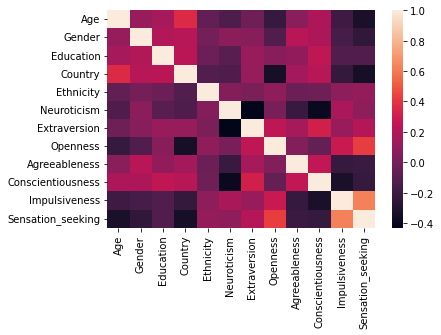

In [12]:
import seaborn as sns
sns.heatmap(data.corr())


# Feature Selection

# Heroin


In [13]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [14]:
cols = [ 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

In [16]:

encoded_data= data.apply(LabelEncoder().fit_transform)

In [17]:
encoded_data

Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
1       2       1          5        6          5           27            19   
2       1       0          8        6          2           17            35   
3       2       0          5        6          2           19            28   
4       0       1          7        6          2           22            17   
5       2       1          8        6          2           31            11   
...   ...     ...        ...      ...        ...          ...           ...   
1884    0       1          4        0          2           13            34   
1885    0       0          4        0          2           21            34   
1886    1       1          6        0          2           35            13   
1887    0       1          4        0          2           33             9   
1888    0       0          4        4          2           19            36   

      Openness  Agreeableness  Conscientiousness  ...  Ecstasy  Heroin  \
ID                                                ...                    
1           16             17                 24  ...        0       0   
2           29             28                 23  ...        4       0   
3           14             12                 16  ...        0       0   
4           20             27                 28  ...        0       0   
5           17             21                 32  ...        1       0   
...        ...            ...                ...  ...      ...     ...   
1884        31             28                 15  ...        0       0   
1885        24             28                 12  ...        2       0   
1886        11             11                 13  ...        4       0   
1887        22             12                  4  ...        3       0   
1888        30             30                 27  ...        3       0   

      Ketamine  Legal_highs  LSD  Methadone  Mushrooms  Nicotine  Semeron  VSA  
ID                                                                              
1            0            0    0          0          0         2        0    0  
2            2            0    2          3          0         4        0    0  
3            0            0    0          0          1         0        0    0  
4            2            0    0          0          0         2        0    0  
5            0            1    0          0          2         2        0    0  
...        ...          ...  ...        ...        ...       ...      ...  ...  
1884         0            3    3          0          0         0        0    5  
1885         0            3    5          4          4         5        0    0  
1886         2            0    2          0          2         6        0    0  
1887         0            3    3          0          3         4        0    0  
1888         0            3    3          0          3         6        0    2  

[1885 rows x 31 columns]

In [18]:
encoded_data['Heroin'] = encoded_data['Heroin'].map(change)
encoded_data['Heroin'].unique()

array([0, 1, 2, 3, 5, 6, 4], dtype=int64)

In [19]:
def changeBin(a):
    
    if (a>=2):
        a = 1
    
    elif ((a == '0') or (a == '1') ):
        a = 0
    
    return a

In [20]:
encoded_data['Heroin'] = encoded_data['Heroin'].map(changeBin)
encoded_data['Heroin'].unique()

array([0, 1], dtype=int64)

In [21]:
Heroin_target_data= encoded_data['Heroin']
Heroin_target_data

ID
1       0
2       0
3       0
4       0
5       0
       ..
1884    0
1885    0
1886    0
1887    0
1888    0
Name: Heroin, Length: 1885, dtype: int64

In [22]:
input_data = encoded_data.iloc[ :, :12]
input_data

Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
1       2       1          5        6          5           27            19   
2       1       0          8        6          2           17            35   
3       2       0          5        6          2           19            28   
4       0       1          7        6          2           22            17   
5       2       1          8        6          2           31            11   
...   ...     ...        ...      ...        ...          ...           ...   
1884    0       1          4        0          2           13            34   
1885    0       0          4        0          2           21            34   
1886    1       1          6        0          2           35            13   
1887    0       1          4        0          2           33             9   
1888    0       0          4        4          2           19            36   

      Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                
1           16             17                 24              3   
2           29             28                 23              2   
3           14             12                 16              1   
4           20             27                 28              1   
5           17             21                 32              3   
...        ...            ...                ...            ...   
1884        31             28                 15              6   
1885        24             28                 12              6   
1886        11             11                 13              5   
1887        22             12                  4              7   
1888        30             30                 27              6   

      Sensation_seeking  
ID                       
1                     2  
2                     5  
3                     7  
4                     2  
5                     5  
...                 ...  
1884                 10  
1885                  8  
1886                  4  
1887                  9  
1888                  9  

[1885 rows x 12 columns]

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data, Heroin_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1262, 12) (623, 12) (1262,) (623,)


In [24]:
X_train

Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
1179    1       1          4        0          2           19            25   
1879    0       0          4        0          5           23            10   
217     1       1          5        6          2           26            30   
886     0       0          4        0          4           38            23   
66      2       0          4        6          2           31            26   
...   ...     ...        ...      ...        ...          ...           ...   
414     1       1          6        6          2           25            30   
718     2       0          6        0          2           16            17   
1325    0       1          4        0          2           28            19   
685     2       1          5        6          2           33            18   
1694    1       1          6        6          2           19            28   

      Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                
1179        21             33                 25              7   
1879        24             18                 23              7   
217         22             32                 24              6   
886         22             28                 23              3   
66          14             30                 28              5   
...        ...            ...                ...            ...   
414         13             26                 22              2   
718         18             24                 26              2   
1325        27             26                 16              4   
685         28             15                 12              7   
1694        13             32                 31              1   

      Sensation_seeking  
ID                       
1179                  7  
1879                  9  
217                   8  
886                   8  
66                    5  
...                 ...  
414                   4  
718                   3  
1325                  4  
685                  10  
1694                  2  

[1262 rows x 12 columns]

In [25]:
from sklearn.feature_selection import chi2
import pandas as pd

In [26]:
chi_scores = chi2(X_train,Y_train)

In [27]:
chi_scores

(array([4.61432638e-02, 7.50588936e+00, 9.78383483e+00, 1.80352614e+02,
        1.15258987e+00, 1.31757274e+02, 1.62506421e+01, 7.45854918e+01,
        6.39080789e+01, 6.00565278e+01, 7.10569933e+01, 7.47170851e+01]),
 array([8.29915587e-01, 6.14975658e-03, 1.76052754e-03, 4.05910897e-41,
        2.83007655e-01, 1.69078482e-30, 5.54907854e-05, 5.80683816e-18,
        1.30361963e-15, 9.21718000e-15, 3.47053264e-17, 5.43239614e-18]))

In [28]:
p_val = pd.Series(chi_scores[1])
p_val.index = input_data.columns
p_val

Age                  8.299156e-01
Gender               6.149757e-03
Education            1.760528e-03
Country              4.059109e-41
Ethnicity            2.830077e-01
Neuroticism          1.690785e-30
Extraversion         5.549079e-05
Openness             5.806838e-18
Agreeableness        1.303620e-15
Conscientiousness    9.217180e-15
Impulsiveness        3.470533e-17
Sensation_seeking    5.432396e-18
dtype: float64

In [29]:
p_val.sort_index(ascending=True)

Age                  8.299156e-01
Agreeableness        1.303620e-15
Conscientiousness    9.217180e-15
Country              4.059109e-41
Education            1.760528e-03
Ethnicity            2.830077e-01
Extraversion         5.549079e-05
Gender               6.149757e-03
Impulsiveness        3.470533e-17
Neuroticism          1.690785e-30
Openness             5.806838e-18
Sensation_seeking    5.432396e-18
dtype: float64

In [30]:
p_val=p_val.sort_values(ascending=False)

In [31]:
p_val

Age                  8.299156e-01
Ethnicity            2.830077e-01
Gender               6.149757e-03
Education            1.760528e-03
Extraversion         5.549079e-05
Conscientiousness    9.217180e-15
Agreeableness        1.303620e-15
Impulsiveness        3.470533e-17
Openness             5.806838e-18
Sensation_seeking    5.432396e-18
Neuroticism          1.690785e-30
Country              4.059109e-41
dtype: float64

<AxesSubplot:>

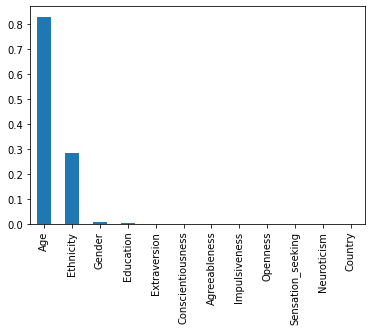

In [32]:
p_val.plot.bar()


In [ ]:
#Heroine: Ethnicity, Age ,Gender ,Extraversion, Education, Agreeableness

# Heroin

In [35]:
Heroine_input_data = encoded_data[['Ethnicity', 'Age' ,'Gender' ,'Extraversion', 'Education', 'Agreeableness']]

In [36]:
Heroine_input_data

Ethnicity  Age  Gender  Extraversion  Education  Agreeableness
ID                                                                  
1             5    2       1            19          5             17
2             2    1       0            35          8             28
3             2    2       0            28          5             12
4             2    0       1            17          7             27
5             2    2       1            11          8             21
...         ...  ...     ...           ...        ...            ...
1884          2    0       1            34          4             28
1885          2    0       0            34          4             28
1886          2    1       1            13          6             11
1887          2    0       1             9          4             12
1888          2    0       0            36          4             30

[1885 rows x 6 columns]

In [38]:
encoded_data['Heroin'] = encoded_data['Heroin'].map(change)

In [39]:
encoded_data['Heroin'].unique()

array([0, 1], dtype=int64)

In [40]:
Heroin_target_data= encoded_data['Heroin']
Heroin_target_data

ID
1       0
2       0
3       0
4       0
5       0
       ..
1884    0
1885    0
1886    0
1887    0
1888    0
Name: Heroin, Length: 1885, dtype: int64

In [41]:
Heroine_input_data

Ethnicity  Age  Gender  Extraversion  Education  Agreeableness
ID                                                                  
1             5    2       1            19          5             17
2             2    1       0            35          8             28
3             2    2       0            28          5             12
4             2    0       1            17          7             27
5             2    2       1            11          8             21
...         ...  ...     ...           ...        ...            ...
1884          2    0       1            34          4             28
1885          2    0       0            34          4             28
1886          2    1       1            13          6             11
1887          2    0       1             9          4             12
1888          2    0       0            36          4             30

[1885 rows x 6 columns]

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(Heroine_input_data, Heroin_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1262, 6) (623, 6) (1262,) (623,)


# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# from sklearn.metrics import sensitivity_score, specificity_score
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

Heroin_DT = DecisionTreeClassifier()
Heroin_DT.fit(X_train,Y_train)
Heroin_DT_predictions=Heroin_DT.predict(X_test)

# pd.Series(Heroin_DT.feature_importances_, index=input_data.columns[0:]).plot.bar(color='steelblue', figsize=(12, 6))

Heroin_DT_accuracy = accuracy_score(Y_test, Heroin_DT_predictions)
Heroin_DT_precision = precision_score(Y_test, Heroin_DT_predictions)
Heroin_DT_recall = recall_score(Y_test, Heroin_DT_predictions)


In [44]:
print("Accuracy: ", Heroin_DT_accuracy,"\nprecision",Heroin_DT_precision,"\nRecall", Heroin_DT_recall)

Accuracy:  0.7319422150882825 
precision 0.12727272727272726 
Recall 0.16470588235294117


In [45]:
print(classification_report(Y_test, Heroin_DT_predictions, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       538
           1       0.13      0.16      0.14        85

    accuracy                           0.73       623
   macro avg       0.49      0.49      0.49       623
weighted avg       0.76      0.73      0.75       623



In [ ]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(Heroin_DT, 
                   feature_names=input_data.columns,  
                   class_names=['0','1'],
                   filled=True)
fig.savefig("Heroin_DT_decistion_tree.png")

# SVC

In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Heroin_svc = SVC(kernel='sigmoid', C=1)
Heroin_svc.fit(X_train,Y_train)

Heroin_svc_predictions=Heroin_svc.predict(X_test)

Heroin_SVC_accuracy = accuracy_score(Y_test, Heroin_svc_predictions)
Heroin_SVC_precision = precision_score(Y_test, Heroin_svc_predictions)
Heroin_SVC_recall = recall_score(Y_test, Heroin_svc_predictions)


In [47]:
print("Accuracy: ", Heroin_SVC_accuracy,"\nprecision",Heroin_SVC_precision,"\nRecall", Heroin_SVC_recall)

Accuracy:  0.7897271268057785 
precision 0.2553191489361702 
Recall 0.2823529411764706


# Random Forest

In [48]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
Heroin_RF=RandomForestClassifier(n_estimators=100, 
                            criterion="entropy")


Heroin_RF.fit(X_train,Y_train)
Heroin_RF_predictions=Heroin_RF.predict(X_test)

Heroin_RF_accuracy = accuracy_score(Y_test, Heroin_RF_predictions)
Heroin_RF_precision = precision_score(Y_test, Heroin_RF_predictions)
Heroin_RF_recall = recall_score(Y_test, Heroin_RF_predictions)
#Train the model using the training sets y_pred=clf.predict(X_test)


In [49]:
print("Accuracy: ", Heroin_RF_accuracy,"\nprecision",Heroin_RF_precision,"\nRecall", Heroin_RF_recall)

Accuracy:  0.8346709470304976 
precision 0.25 
Recall 0.10588235294117647


# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

Heroin_KNN = KNeighborsClassifier(n_neighbors=10)
Heroin_KNN.fit(X_train,Y_train)
Heroin_KNN_predictions=Heroin_DT.predict(X_test)

Heroin_KNN_accuracy = accuracy_score(Y_test, Heroin_KNN_predictions)
Heroin_KNN_precision = precision_score(Y_test, Heroin_KNN_predictions)
Heroin_KNN_recall = recall_score(Y_test, Heroin_KNN_predictions)

In [51]:
print("Accuracy: ", Heroin_KNN_accuracy,"\nprecision",Heroin_KNN_precision,"\nRecall", Heroin_KNN_recall)

Accuracy:  0.7319422150882825 
precision 0.12727272727272726 
Recall 0.16470588235294117


[[442  96]
 [ 71  14]]
[[468  70]
 [ 61  24]]
[[511  27]
 [ 76   9]]
[[442  96]
 [ 71  14]]


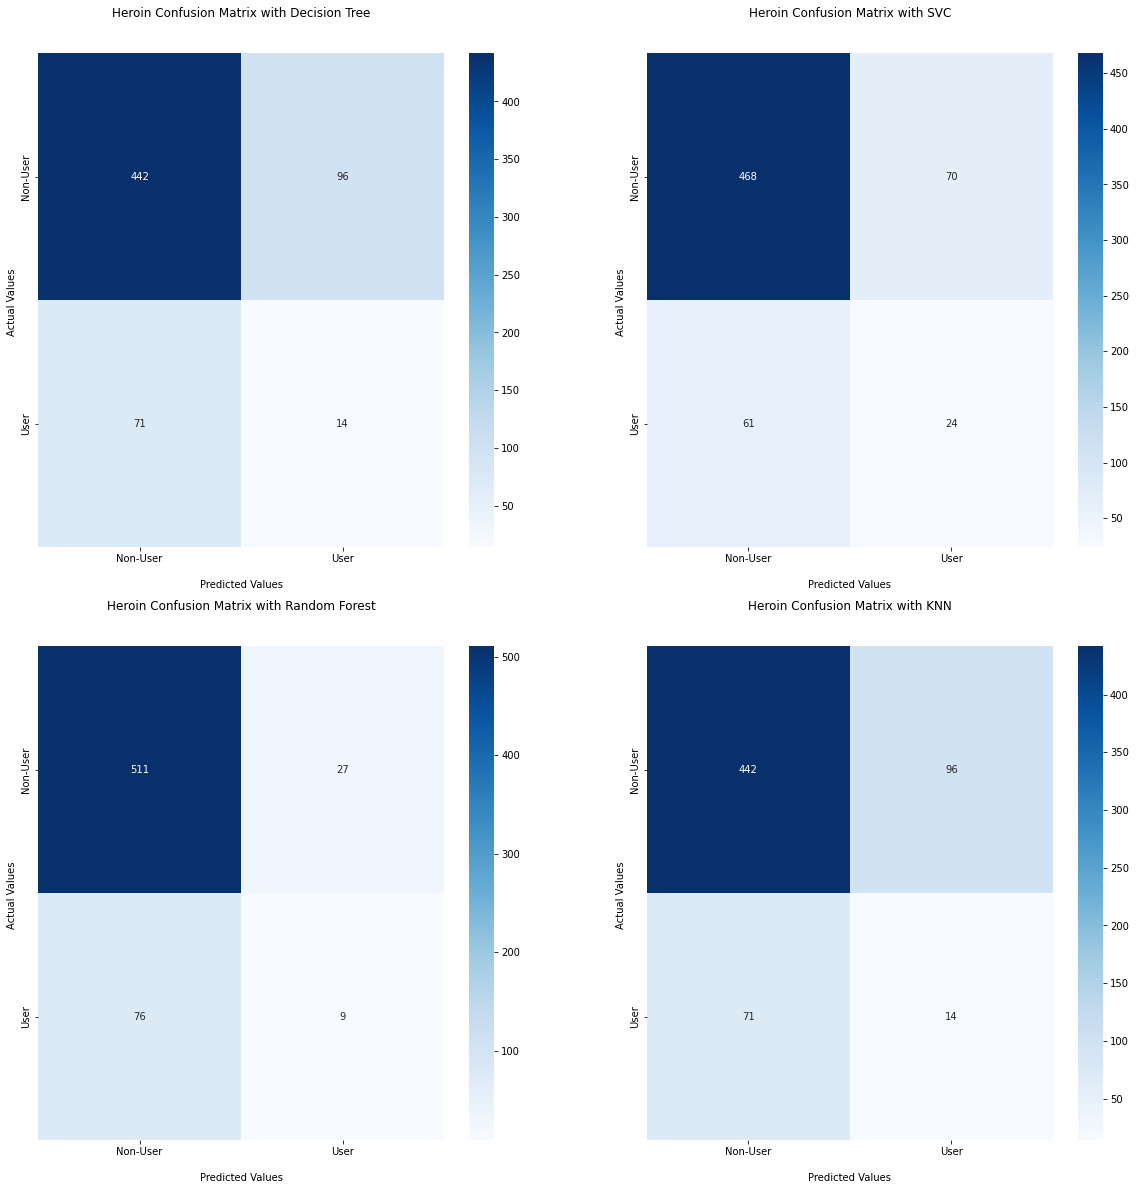

In [52]:
import seaborn as sns
fig = plt.figure(figsize=(20,20))



plt.subplot(2, 2, 1)
cf_matrix_Heroin_DT = confusion_matrix(Y_test, Heroin_DT_predictions)
print(cf_matrix_Heroin_DT)
ax = sns.heatmap(cf_matrix_Heroin_DT, annot=True, cmap='Blues', fmt='g')
ax.set_title('Heroin Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])


plt.subplot(2, 2, 2)
cf_matrix_Heroin_svc = confusion_matrix(Y_test, Heroin_svc_predictions)
print(cf_matrix_Heroin_svc)
ax = sns.heatmap(cf_matrix_Heroin_svc, annot=True, cmap='Blues', fmt='g')
ax.set_title('Heroin Confusion Matrix with SVC\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 3)
cf_matrix_Heroin_RF = confusion_matrix(Y_test, Heroin_RF_predictions)
print(cf_matrix_Heroin_RF)
ax = sns.heatmap(cf_matrix_Heroin_RF, annot=True, cmap='Blues', fmt='g')
ax.set_title('Heroin Confusion Matrix with Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 4)
cf_matrix_Heroin_KNN = confusion_matrix(Y_test, Heroin_KNN_predictions)
print(cf_matrix_Heroin_KNN)
ax = sns.heatmap(cf_matrix_Heroin_KNN, annot=True, cmap='Blues', fmt='g')
ax.set_title('Heroin Confusion Matrix with KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()

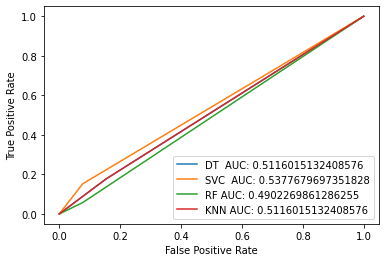

In [84]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Heroin_DT_predictions)
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  Heroin_svc_predictions)
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  Heroin_RF_predictions)
fpr3, tpr3, _ = metrics.roc_curve(Y_test,  Heroin_KNN_predictions)
#create ROC curve
plt.plot(fpr,tpr, label="DT  AUC: "+str(roc_auc_score(Y_test,  Heroin_DT_predictions)))
plt.plot(fpr1,tpr1, label="SVC  AUC: "+str(roc_auc_score(Y_test,  Heroin_svc_predictions)))
plt.plot(fpr2,tpr2, label="RF AUC: "+str(roc_auc_score(Y_test,  Heroin_RF_predictions)))
plt.plot(fpr3,tpr3, label="KNN AUC: "+str(roc_auc_score(Y_test,  Heroin_KNN_predictions)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Alcohol

# Feature Selection

In [55]:
encoded_data['Alcohol'] = encoded_data['Alcohol'].map(change)
encoded_data['Alcohol'].unique()

encoded_data['Alcohol'] = encoded_data['Alcohol'].map(changeBin)
encoded_data['Alcohol'].unique()

array([1, 0], dtype=int64)

In [56]:
encoded_data

Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
1       2       1          5        6          5           27            19   
2       1       0          8        6          2           17            35   
3       2       0          5        6          2           19            28   
4       0       1          7        6          2           22            17   
5       2       1          8        6          2           31            11   
...   ...     ...        ...      ...        ...          ...           ...   
1884    0       1          4        0          2           13            34   
1885    0       0          4        0          2           21            34   
1886    1       1          6        0          2           35            13   
1887    0       1          4        0          2           33             9   
1888    0       0          4        4          2           19            36   

      Openness  Agreeableness  Conscientiousness  ...  Ecstasy  Heroin  \
ID                                                ...                    
1           16             17                 24  ...        0       0   
2           29             28                 23  ...        4       0   
3           14             12                 16  ...        0       0   
4           20             27                 28  ...        0       0   
5           17             21                 32  ...        1       0   
...        ...            ...                ...  ...      ...     ...   
1884        31             28                 15  ...        0       0   
1885        24             28                 12  ...        2       0   
1886        11             11                 13  ...        4       0   
1887        22             12                  4  ...        3       0   
1888        30             30                 27  ...        3       0   

      Ketamine  Legal_highs  LSD  Methadone  Mushrooms  Nicotine  Semeron  VSA  
ID                                                                              
1            0            0    0          0          0         2        0    0  
2            2            0    2          3          0         4        0    0  
3            0            0    0          0          1         0        0    0  
4            2            0    0          0          0         2        0    0  
5            0            1    0          0          2         2        0    0  
...        ...          ...  ...        ...        ...       ...      ...  ...  
1884         0            3    3          0          0         0        0    5  
1885         0            3    5          4          4         5        0    0  
1886         2            0    2          0          2         6        0    0  
1887         0            3    3          0          3         4        0    0  
1888         0            3    3          0          3         6        0    2  

[1885 rows x 31 columns]

In [57]:
Alcohol_target_data= encoded_data['Alcohol']
Alcohol_target_data

ID
1       1
2       1
3       1
4       1
5       1
       ..
1884    1
1885    1
1886    1
1887    1
1888    1
Name: Alcohol, Length: 1885, dtype: int64

In [ ]:
input_data = encoded_data.iloc[ :, :12]
input_data

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data, Alcohol_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1262, 12) (623, 12) (1262,) (623,)


In [59]:
X_train

Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
389     1       0          6        6          0           12            25   
532     4       0          6        6          2           33            23   
1334    0       0          6        0          2           28            21   
1122    1       0          6        6          2           14            31   
1555    0       0          4        6          2           23             5   
...   ...     ...        ...      ...        ...          ...           ...   
1011    3       0          6        0          2           17            23   
176     4       1          6        6          2           30            23   
1153    2       1          6        0          2           40            10   
1325    0       1          4        0          2           28            19   
1062    0       1          3        0          4           21            27   

      Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                
389         16             14                 36              2   
532         24             10                 28              3   
1334        23             17                 26              5   
1122        23             26                 29              4   
1555        14             11                 21              7   
...        ...            ...                ...            ...   
1011        20             23                 27              0   
176         23             31                 25              4   
1153        16             21                 14              6   
1325        27             26                 16              4   
1062        10             24                 29              7   

      Sensation_seeking  
ID                       
389                   6  
532                   2  
1334                  7  
1122                  5  
1555                  5  
...                 ...  
1011                  4  
176                   6  
1153                  3  
1325                  4  
1062                  6  

[1262 rows x 12 columns]

In [60]:
from sklearn.feature_selection import chi2
import pandas as pd

chi_scores = chi2(X_train,Y_train)

chi_scores


(array([3.49567693e-01, 2.77826369e-04, 6.58270472e-01, 1.33605958e+00,
        4.93866923e+00, 4.22007035e-03, 4.66268981e-01, 5.19214137e+00,
        6.06848758e-02, 4.70368127e-02, 4.08168434e+00, 1.30889180e+01]),
 array([5.54357951e-01, 9.86701377e-01, 4.17171196e-01, 2.47730066e-01,
        2.62622489e-02, 9.48204201e-01, 4.94708638e-01, 2.26892428e-02,
        8.05416723e-01, 8.28302083e-01, 4.33504252e-02, 2.97047880e-04]))

In [61]:
p_val = pd.Series(chi_scores[1])
p_val.index = input_data.columns
p_val

Age                  0.554358
Gender               0.986701
Education            0.417171
Country              0.247730
Ethnicity            0.026262
Neuroticism          0.948204
Extraversion         0.494709
Openness             0.022689
Agreeableness        0.805417
Conscientiousness    0.828302
Impulsiveness        0.043350
Sensation_seeking    0.000297
dtype: float64

In [62]:
p_val=p_val.sort_values(ascending=False)
p_val



Gender               0.986701
Neuroticism          0.948204
Conscientiousness    0.828302
Agreeableness        0.805417
Age                  0.554358
Extraversion         0.494709
Education            0.417171
Country              0.247730
Impulsiveness        0.043350
Ethnicity            0.026262
Openness             0.022689
Sensation_seeking    0.000297
dtype: float64

<AxesSubplot:>

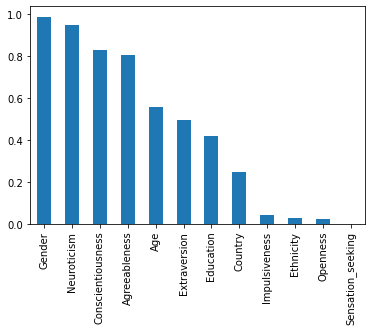

In [63]:
p_val.plot.bar()

In [ ]:
#Alcohol: 'Neuroticism','Extraversion','Conscientiousness','Education','Gender','Age','Agreeableness','Openness','Country'

In [64]:
Alcohol_input_data = encoded_data[['Neuroticism','Extraversion','Conscientiousness','Education','Gender','Age','Agreeableness','Openness','Country']]

In [65]:
encoded_data['Alcohol'] = encoded_data['Alcohol'].map(change)
encoded_data['Alcohol']

ID
1       1
2       1
3       1
4       1
5       1
       ..
1884    1
1885    1
1886    1
1887    1
1888    1
Name: Alcohol, Length: 1885, dtype: int64

In [66]:
encoded_data['Alcohol'].unique()

array([1, 0], dtype=int64)

In [67]:
Alcohol_target_data= encoded_data['Alcohol']
Alcohol_target_data.unique()

array([1, 0], dtype=int64)

In [68]:
Alcohol_input_data

Neuroticism  Extraversion  Conscientiousness  Education  Gender  Age  \
ID                                                                           
1              27            19                 24          5       1    2   
2              17            35                 23          8       0    1   
3              19            28                 16          5       0    2   
4              22            17                 28          7       1    0   
5              31            11                 32          8       1    2   
...           ...           ...                ...        ...     ...  ...   
1884           13            34                 15          4       1    0   
1885           21            34                 12          4       0    0   
1886           35            13                 13          6       1    1   
1887           33             9                  4          4       1    0   
1888           19            36                 27          4       0    0   

      Agreeableness  Openness  Country  
ID                                      
1                17        16        6  
2                28        29        6  
3                12        14        6  
4                27        20        6  
5                21        17        6  
...             ...       ...      ...  
1884             28        31        0  
1885             28        24        0  
1886             11        11        0  
1887             12        22        0  
1888             30        30        4  

[1885 rows x 9 columns]

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(Alcohol_input_data, Alcohol_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1262, 9) (623, 9) (1262,) (623,)


# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Alcohol_DT = DecisionTreeClassifier()
Alcohol_DT.fit(X_train,Y_train)
Alcohol_DT_predictions=Alcohol_DT.predict(X_test)

Alcohol_DT_accuracy = accuracy_score(Y_test, Alcohol_DT_predictions)
Alcohol_DT_precision = precision_score(Y_test, Alcohol_DT_predictions)
Alcohol_DT_recall = recall_score(Y_test, Alcohol_DT_predictions)

In [71]:
print("Accuracy: ", Alcohol_DT_accuracy,"\nprecision",Alcohol_DT_precision,"\nRecall", Alcohol_DT_recall)

Accuracy:  0.956661316211878 
precision 0.9802306425041186 
Recall 0.9754098360655737


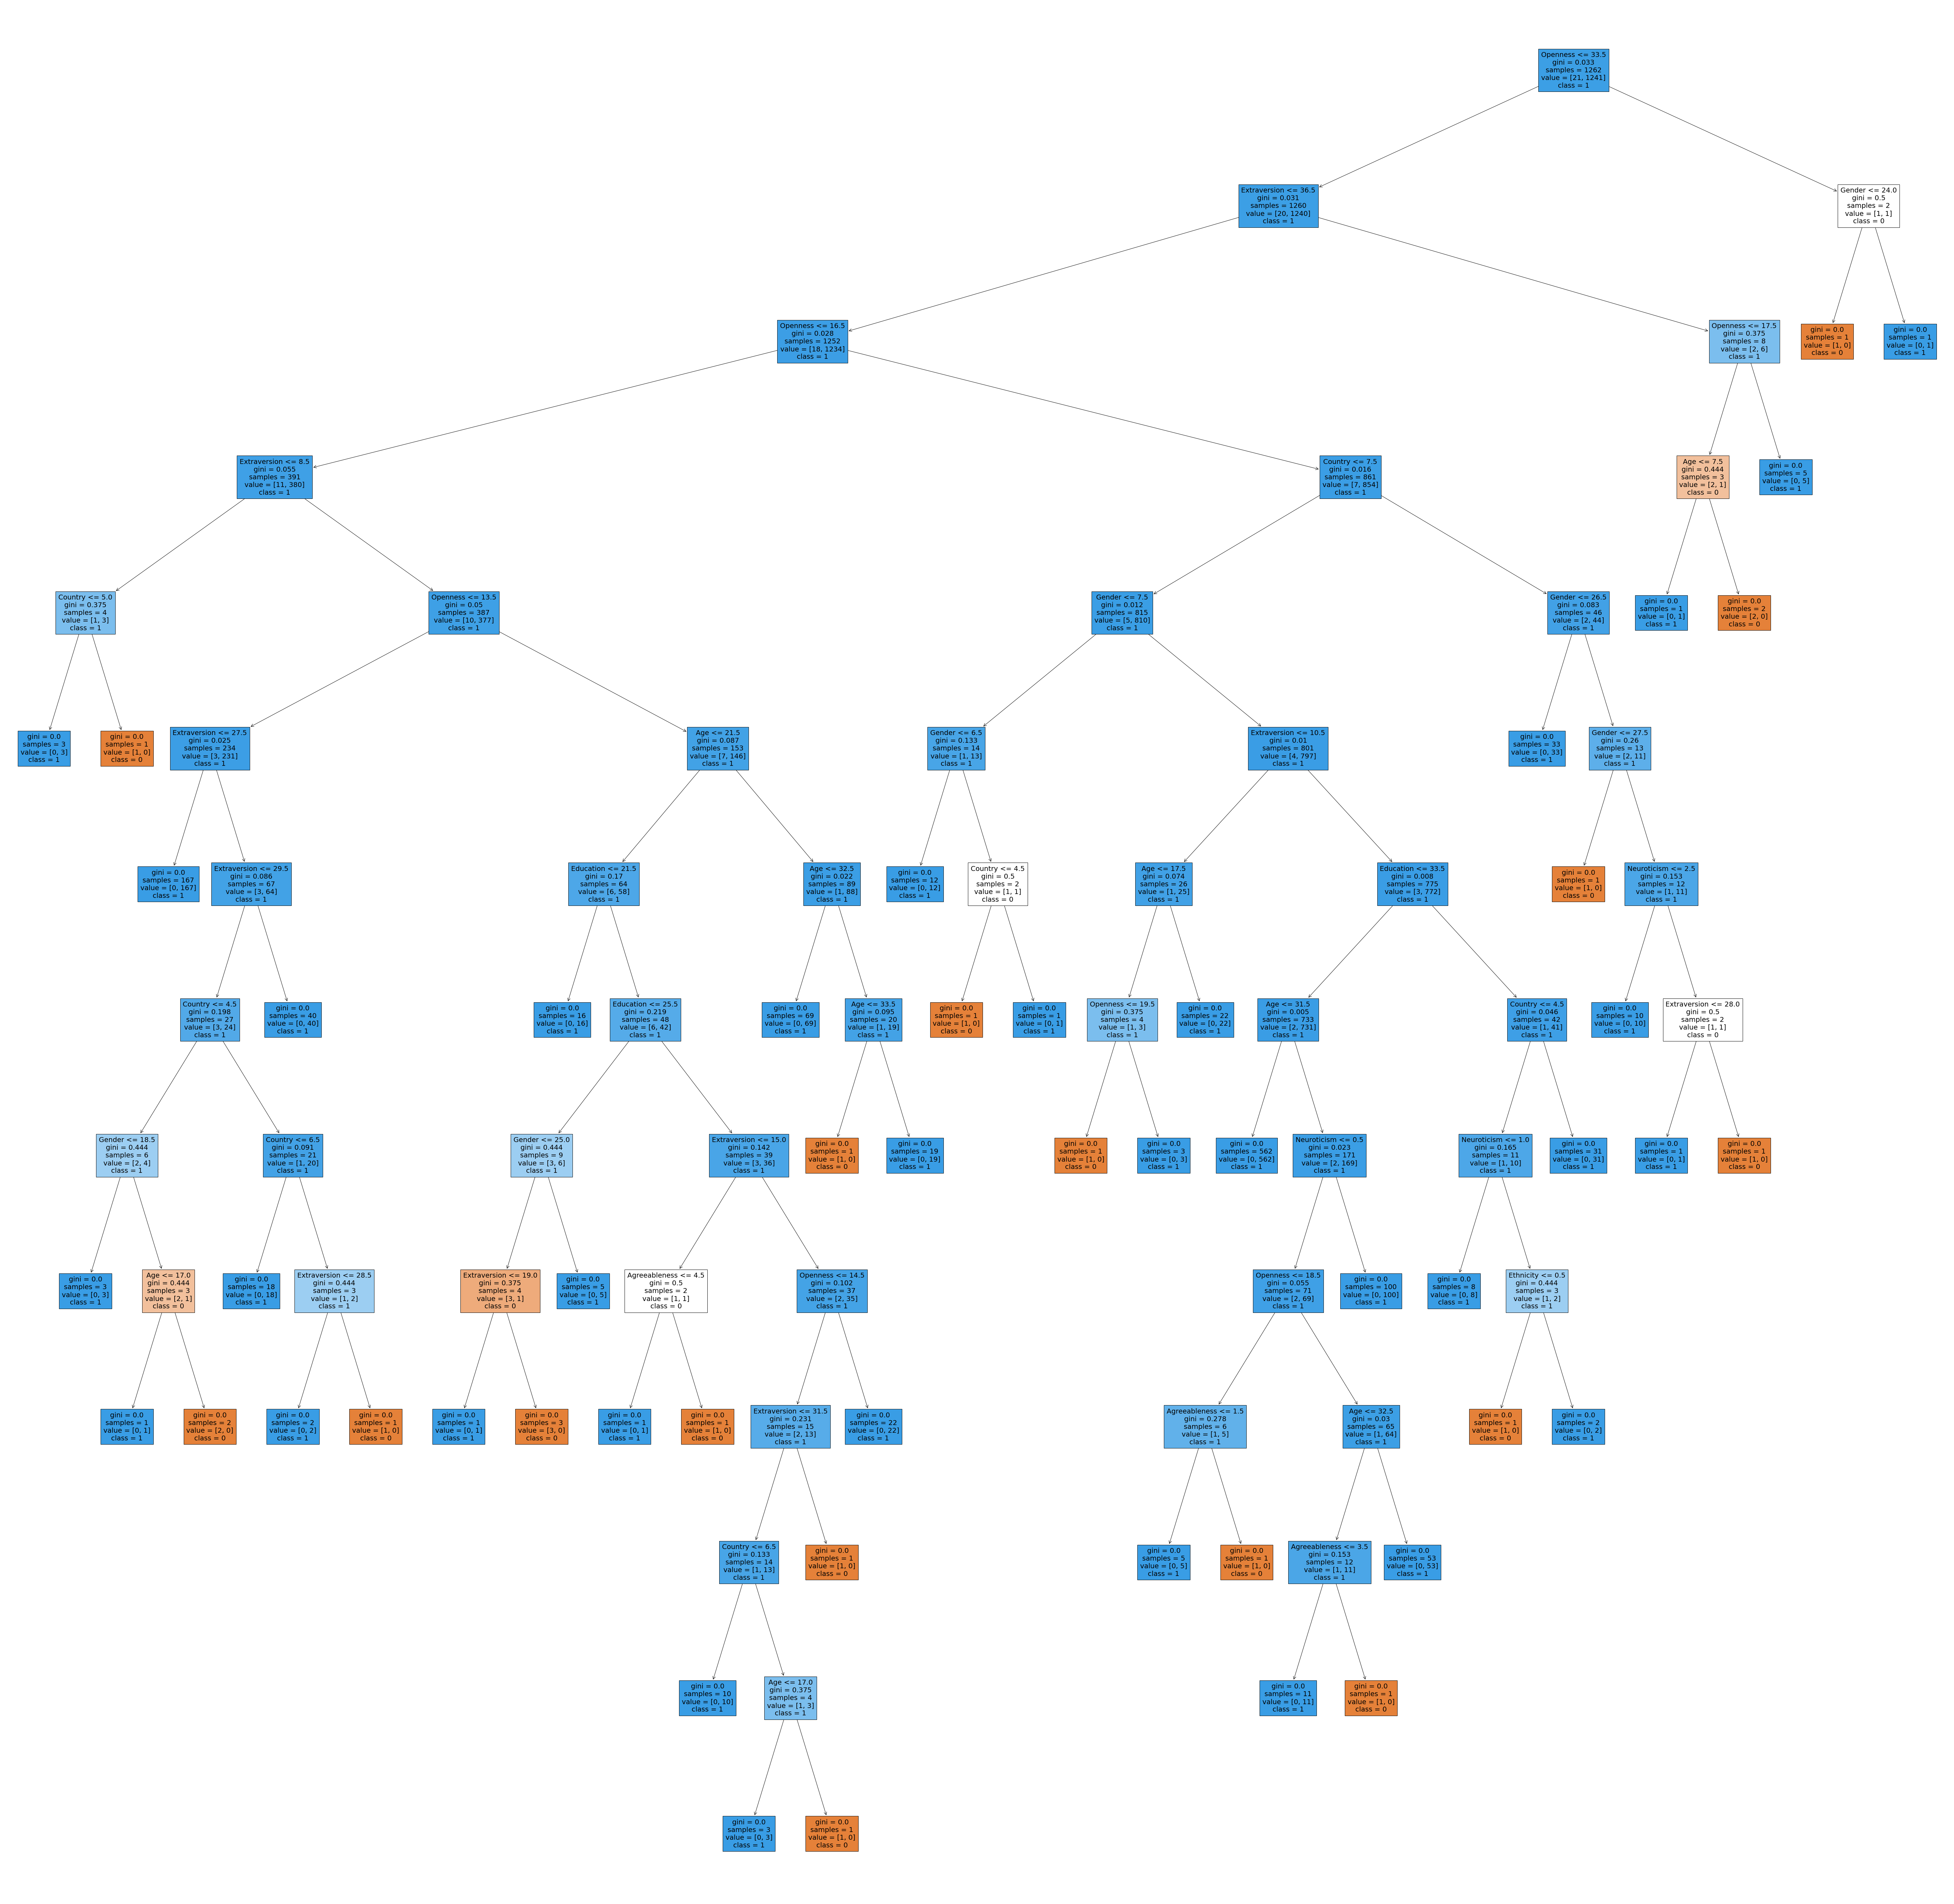

In [72]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(Alcohol_DT, 
                   feature_names=input_data.columns,  
                   class_names=['0','1'],
                   filled=True)
fig.savefig("Alcohol_DT_decistion_tree.png")

# SVC

In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Alcohol_svc = SVC(kernel='sigmoid', C=2)
Alcohol_svc.fit(X_train,Y_train)

Alcohol_svc_predictions=Alcohol_svc.predict(X_test)

Alcohol_SVC_accuracy = accuracy_score(Y_test, Alcohol_svc_predictions)
Alcohol_SVC_precision = precision_score(Y_test, Alcohol_svc_predictions)
Alcohol_SVC_recall = recall_score(Y_test, Alcohol_svc_predictions)


In [74]:
print("Accuracy: ", Alcohol_SVC_accuracy,"\nprecision",Alcohol_SVC_precision,"\nRecall", Alcohol_SVC_recall)

Accuracy:  0.9775280898876404 
precision 0.9790996784565916 
Recall 0.9983606557377049


# Random Forest

In [75]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
Alcohol_RF=RandomForestClassifier(n_estimators=100, 
                            max_depth=5,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)


Alcohol_RF.fit(X_train,Y_train)
Alcohol_RF_predictions=Alcohol_RF.predict(X_test)

Alcohol_RF_accuracy = accuracy_score(Y_test, Alcohol_RF_predictions)
Alcohol_RF_precision = precision_score(Y_test, Alcohol_RF_predictions)
Alcohol_RF_recall = recall_score(Y_test, Alcohol_RF_predictions)
#Train the model using the training sets y_pred=clf.predict(X_test)


In [76]:
print("Accuracy: ", Alcohol_RF_accuracy,"\nprecision",Alcohol_RF_precision,"\nRecall", Alcohol_RF_recall)

Accuracy:  0.9791332263242376 
precision 0.9791332263242376 
Recall 1.0


# KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

Alcohol_KNN = KNeighborsClassifier(n_neighbors=5)
Alcohol_KNN.fit(X_train,Y_train)
Alcohol_KNN_predictions=Alcohol_KNN.predict(X_test)

Alcohol_KNN_accuracy = accuracy_score(Y_test, Alcohol_KNN_predictions)
Alcohol_KNN_precision = precision_score(Y_test, Alcohol_KNN_predictions)
Alcohol_KNN_recall = recall_score(Y_test, Alcohol_KNN_predictions)

In [78]:
print("Accuracy: ", Alcohol_KNN_accuracy,"\nprecision",Alcohol_KNN_precision,"\nRecall", Alcohol_KNN_recall)

Accuracy:  0.9791332263242376 
precision 0.9791332263242376 
Recall 1.0


[[  1  12]
 [ 15 595]]
[[  0  13]
 [  1 609]]
[[  0  13]
 [  0 610]]
[[  0  13]
 [  0 610]]


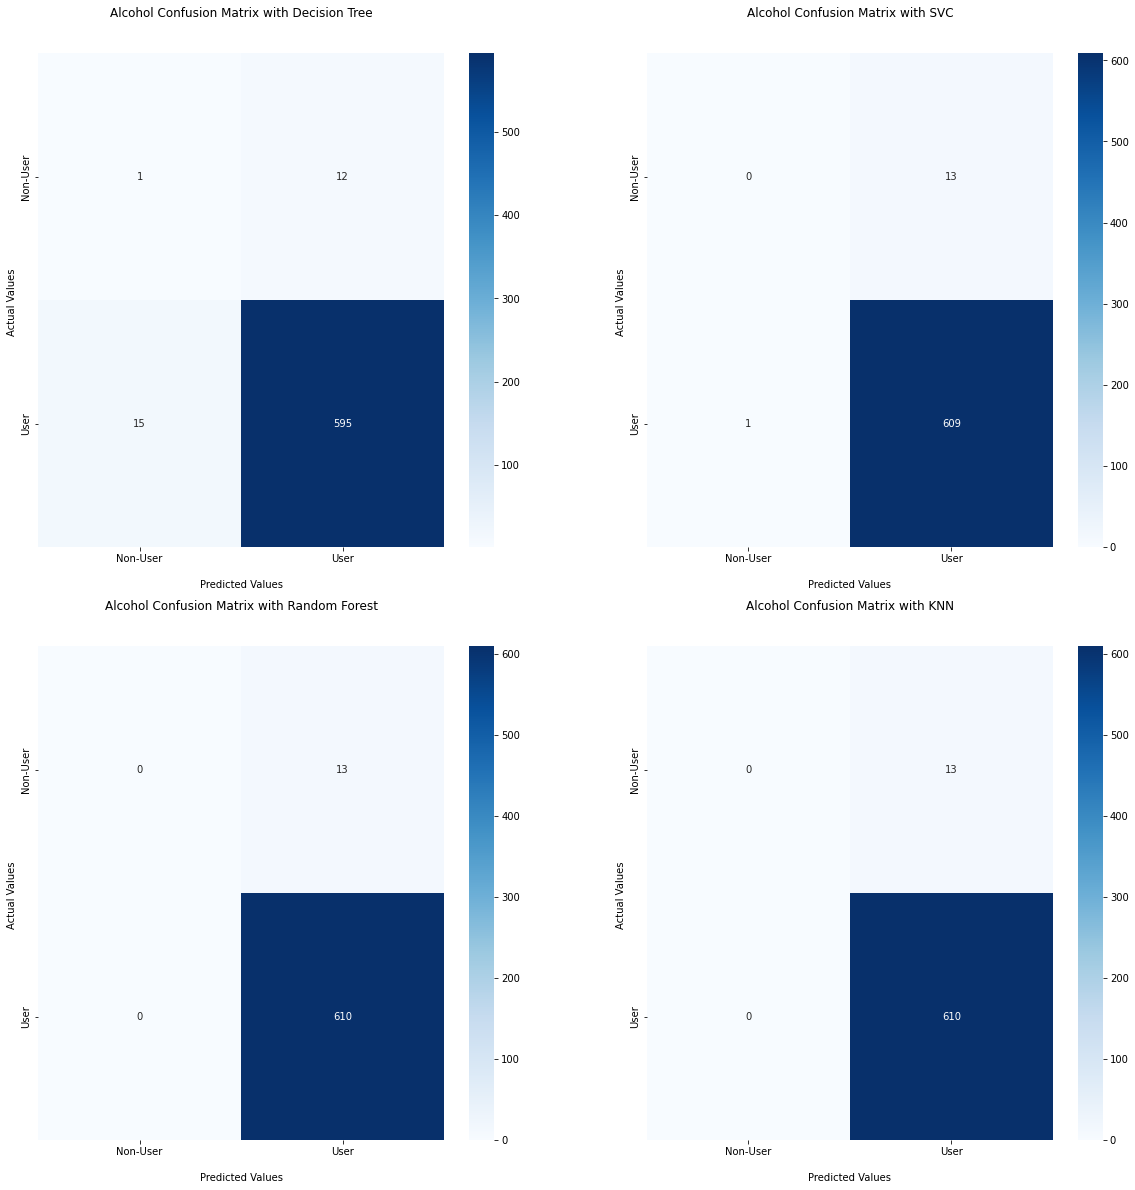

In [79]:
import seaborn as sns
fig = plt.figure(figsize=(20,20))



plt.subplot(2, 2, 1)
cf_matrix_Alcohol_DT = confusion_matrix(Y_test, Alcohol_DT_predictions)
print(cf_matrix_Alcohol_DT)
ax = sns.heatmap(cf_matrix_Alcohol_DT, annot=True, cmap='Blues', fmt='g')
ax.set_title('Alcohol Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])


plt.subplot(2, 2, 2)
cf_matrix_Alcohol_svc = confusion_matrix(Y_test, Alcohol_svc_predictions)
print(cf_matrix_Alcohol_svc)
ax = sns.heatmap(cf_matrix_Alcohol_svc, annot=True, cmap='Blues', fmt='g')
ax.set_title('Alcohol Confusion Matrix with SVC\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 3)
cf_matrix_Alcohol_RF = confusion_matrix(Y_test, Alcohol_RF_predictions)
print(cf_matrix_Alcohol_RF)
ax = sns.heatmap(cf_matrix_Alcohol_RF, annot=True, cmap='Blues', fmt='g')
ax.set_title('Alcohol Confusion Matrix with Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 4)
cf_matrix_Alcohol_KNN = confusion_matrix(Y_test, Alcohol_KNN_predictions)
print(cf_matrix_Alcohol_KNN)
ax = sns.heatmap(cf_matrix_Alcohol_KNN, annot=True, cmap='Blues', fmt='g')
ax.set_title('Alcohol Confusion Matrix with KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()

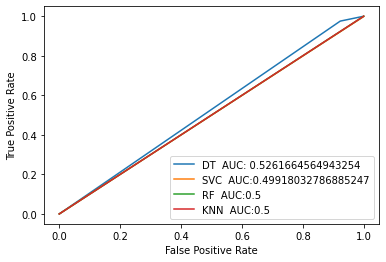

In [83]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Alcohol_DT_predictions)
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  Alcohol_svc_predictions)
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  Alcohol_RF_predictions)
fpr3, tpr3, _ = metrics.roc_curve(Y_test,  Alcohol_KNN_predictions)
#create ROC curve
plt.plot(fpr,tpr, label="DT  AUC: "+str(roc_auc_score(Y_test,  Alcohol_DT_predictions)))
plt.plot(fpr1,tpr1, label="SVC  AUC:"+str(roc_auc_score(Y_test,  Alcohol_svc_predictions)))
plt.plot(fpr2,tpr2, label="RF  AUC:"+str(roc_auc_score(Y_test,  Alcohol_RF_predictions)))
plt.plot(fpr3,tpr3, label="KNN  AUC:"+str(roc_auc_score(Y_test,  Alcohol_KNN_predictions)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Meth

# Feature Selection

In [85]:
encoded_data['Methadone'] = encoded_data['Methadone'].map(change)
encoded_data['Methadone'].unique()

encoded_data['Methadone'] = encoded_data['Methadone'].map(changeBin)
encoded_data['Methadone'].unique()

array([0, 1], dtype=int64)

In [86]:
Methadone_target_data= encoded_data['Methadone']
Methadone_target_data

ID
1       0
2       1
3       0
4       0
5       0
       ..
1884    0
1885    1
1886    0
1887    0
1888    0
Name: Methadone, Length: 1885, dtype: int64

In [87]:
input_data = encoded_data.iloc[ :, :12]
input_data

Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
1       2       1          5        6          5           27            19   
2       1       0          8        6          2           17            35   
3       2       0          5        6          2           19            28   
4       0       1          7        6          2           22            17   
5       2       1          8        6          2           31            11   
...   ...     ...        ...      ...        ...          ...           ...   
1884    0       1          4        0          2           13            34   
1885    0       0          4        0          2           21            34   
1886    1       1          6        0          2           35            13   
1887    0       1          4        0          2           33             9   
1888    0       0          4        4          2           19            36   

      Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                
1           16             17                 24              3   
2           29             28                 23              2   
3           14             12                 16              1   
4           20             27                 28              1   
5           17             21                 32              3   
...        ...            ...                ...            ...   
1884        31             28                 15              6   
1885        24             28                 12              6   
1886        11             11                 13              5   
1887        22             12                  4              7   
1888        30             30                 27              6   

      Sensation_seeking  
ID                       
1                     2  
2                     5  
3                     7  
4                     2  
5                     5  
...                 ...  
1884                 10  
1885                  8  
1886                  4  
1887                  9  
1888                  9  

[1885 rows x 12 columns]

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data, Methadone_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1262, 12) (623, 12) (1262,) (623,)


In [89]:
X_train

Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
1010    0       1          3        6          2           36            29   
1633    2       0          5        5          2           39            24   
1342    2       0          3        0          0           31            13   
1151    3       1          3        3          2           18            27   
1234    0       0          6        6          2           31            20   
...   ...     ...        ...      ...        ...          ...           ...   
1358    0       0          5        5          2           28            24   
876     1       1          7        0          2           26            15   
422     0       0          3        6          2           27            28   
840     0       0          4        3          2            9            34   
184     0       1          6        6          2           42            20   

      Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                
1010        23             21                 22              5   
1633        17             23                 35              7   
1342        13             21                 20              2   
1151        18             26                 30              2   
1234        24             27                 23              4   
...        ...            ...                ...            ...   
1358        18             17                 27              6   
876         16             25                 16              5   
422         20             17                 31              5   
840         24             26                 30              7   
184         22             18                 30              2   

      Sensation_seeking  
ID                       
1010                  7  
1633                 10  
1342                  7  
1151                  4  
1234                  7  
...                 ...  
1358                  7  
876                   5  
422                   8  
840                   6  
184                   7  

[1262 rows x 12 columns]

In [90]:
from sklearn.feature_selection import chi2
import pandas as pd

chi_scores = chi2(X_train,Y_train)

chi_scores

(array([ 34.65594029,  25.81518222,  14.46264401, 414.37841252,
          0.66826792, 133.27586613,  43.32737853,  88.91848426,
         58.37756894, 127.02445283,  58.78734203,  67.63602399]),
 array([3.93436166e-09, 3.75721416e-07, 1.42966879e-04, 4.08385861e-92,
        4.13656140e-01, 7.86824822e-31, 4.63058775e-11, 4.11421120e-21,
        2.16343649e-14, 1.83498602e-29, 1.75667757e-14, 1.96641700e-16]))

In [91]:
p_val = pd.Series(chi_scores[1])
p_val.index = input_data.columns
p_val

Age                  3.934362e-09
Gender               3.757214e-07
Education            1.429669e-04
Country              4.083859e-92
Ethnicity            4.136561e-01
Neuroticism          7.868248e-31
Extraversion         4.630588e-11
Openness             4.114211e-21
Agreeableness        2.163436e-14
Conscientiousness    1.834986e-29
Impulsiveness        1.756678e-14
Sensation_seeking    1.966417e-16
dtype: float64

In [92]:
p_val=p_val.sort_values(ascending=False)
p_val

Ethnicity            4.136561e-01
Education            1.429669e-04
Gender               3.757214e-07
Age                  3.934362e-09
Extraversion         4.630588e-11
Agreeableness        2.163436e-14
Impulsiveness        1.756678e-14
Sensation_seeking    1.966417e-16
Openness             4.114211e-21
Conscientiousness    1.834986e-29
Neuroticism          7.868248e-31
Country              4.083859e-92
dtype: float64

<AxesSubplot:>

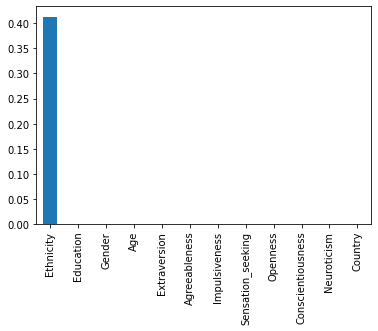

In [93]:
p_val.plot.bar()

In [ ]:
#Methadone = 'Ethnicity','Education','Extraversion','Gender','Age'       

In [94]:
Methadone_input_data = data[['Ethnicity','Education','Extraversion']]


In [95]:
data['Methadone'] = data['Methadone'].map(change)
data['Methadone'].unique()

Methadone_target_data= data['Methadone']
Methadone_target_data.unique()


array([0, 1], dtype=int64)

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(Methadone_input_data, Methadone_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1262, 3) (623, 3) (1262,) (623,)


In [97]:
data['Methadone'] = data['Methadone'].map(change)

data['Methadone'].unique()

array([0, 1], dtype=int64)

In [98]:
Methadone_target_data= data['Methadone']
Methadone_target_data

ID
1       0
2       1
3       0
4       0
5       0
       ..
1884    0
1885    1
1886    0
1887    0
1888    0
Name: Methadone, Length: 1885, dtype: int64

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(Methadone_input_data, Methadone_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1262, 3) (623, 3) (1262,) (623,)


# Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Methadone_DT = DecisionTreeClassifier()
Methadone_DT.fit(X_train,Y_train)
Methadone_DT_predictions=Methadone_DT.predict(X_test)

Methadone_DT_accuracy = accuracy_score(Y_test, Methadone_DT_predictions)
Methadone_DT_precision = precision_score(Y_test, Methadone_DT_predictions)
Methadone_DT_recall = recall_score(Y_test, Methadone_DT_predictions)

In [101]:
print("Accuracy: ", Methadone_DT_accuracy,"\nprecision",Methadone_DT_precision,"\nRecall", Methadone_DT_recall)

Accuracy:  0.7335473515248796 
precision 0.35714285714285715 
Recall 0.13333333333333333


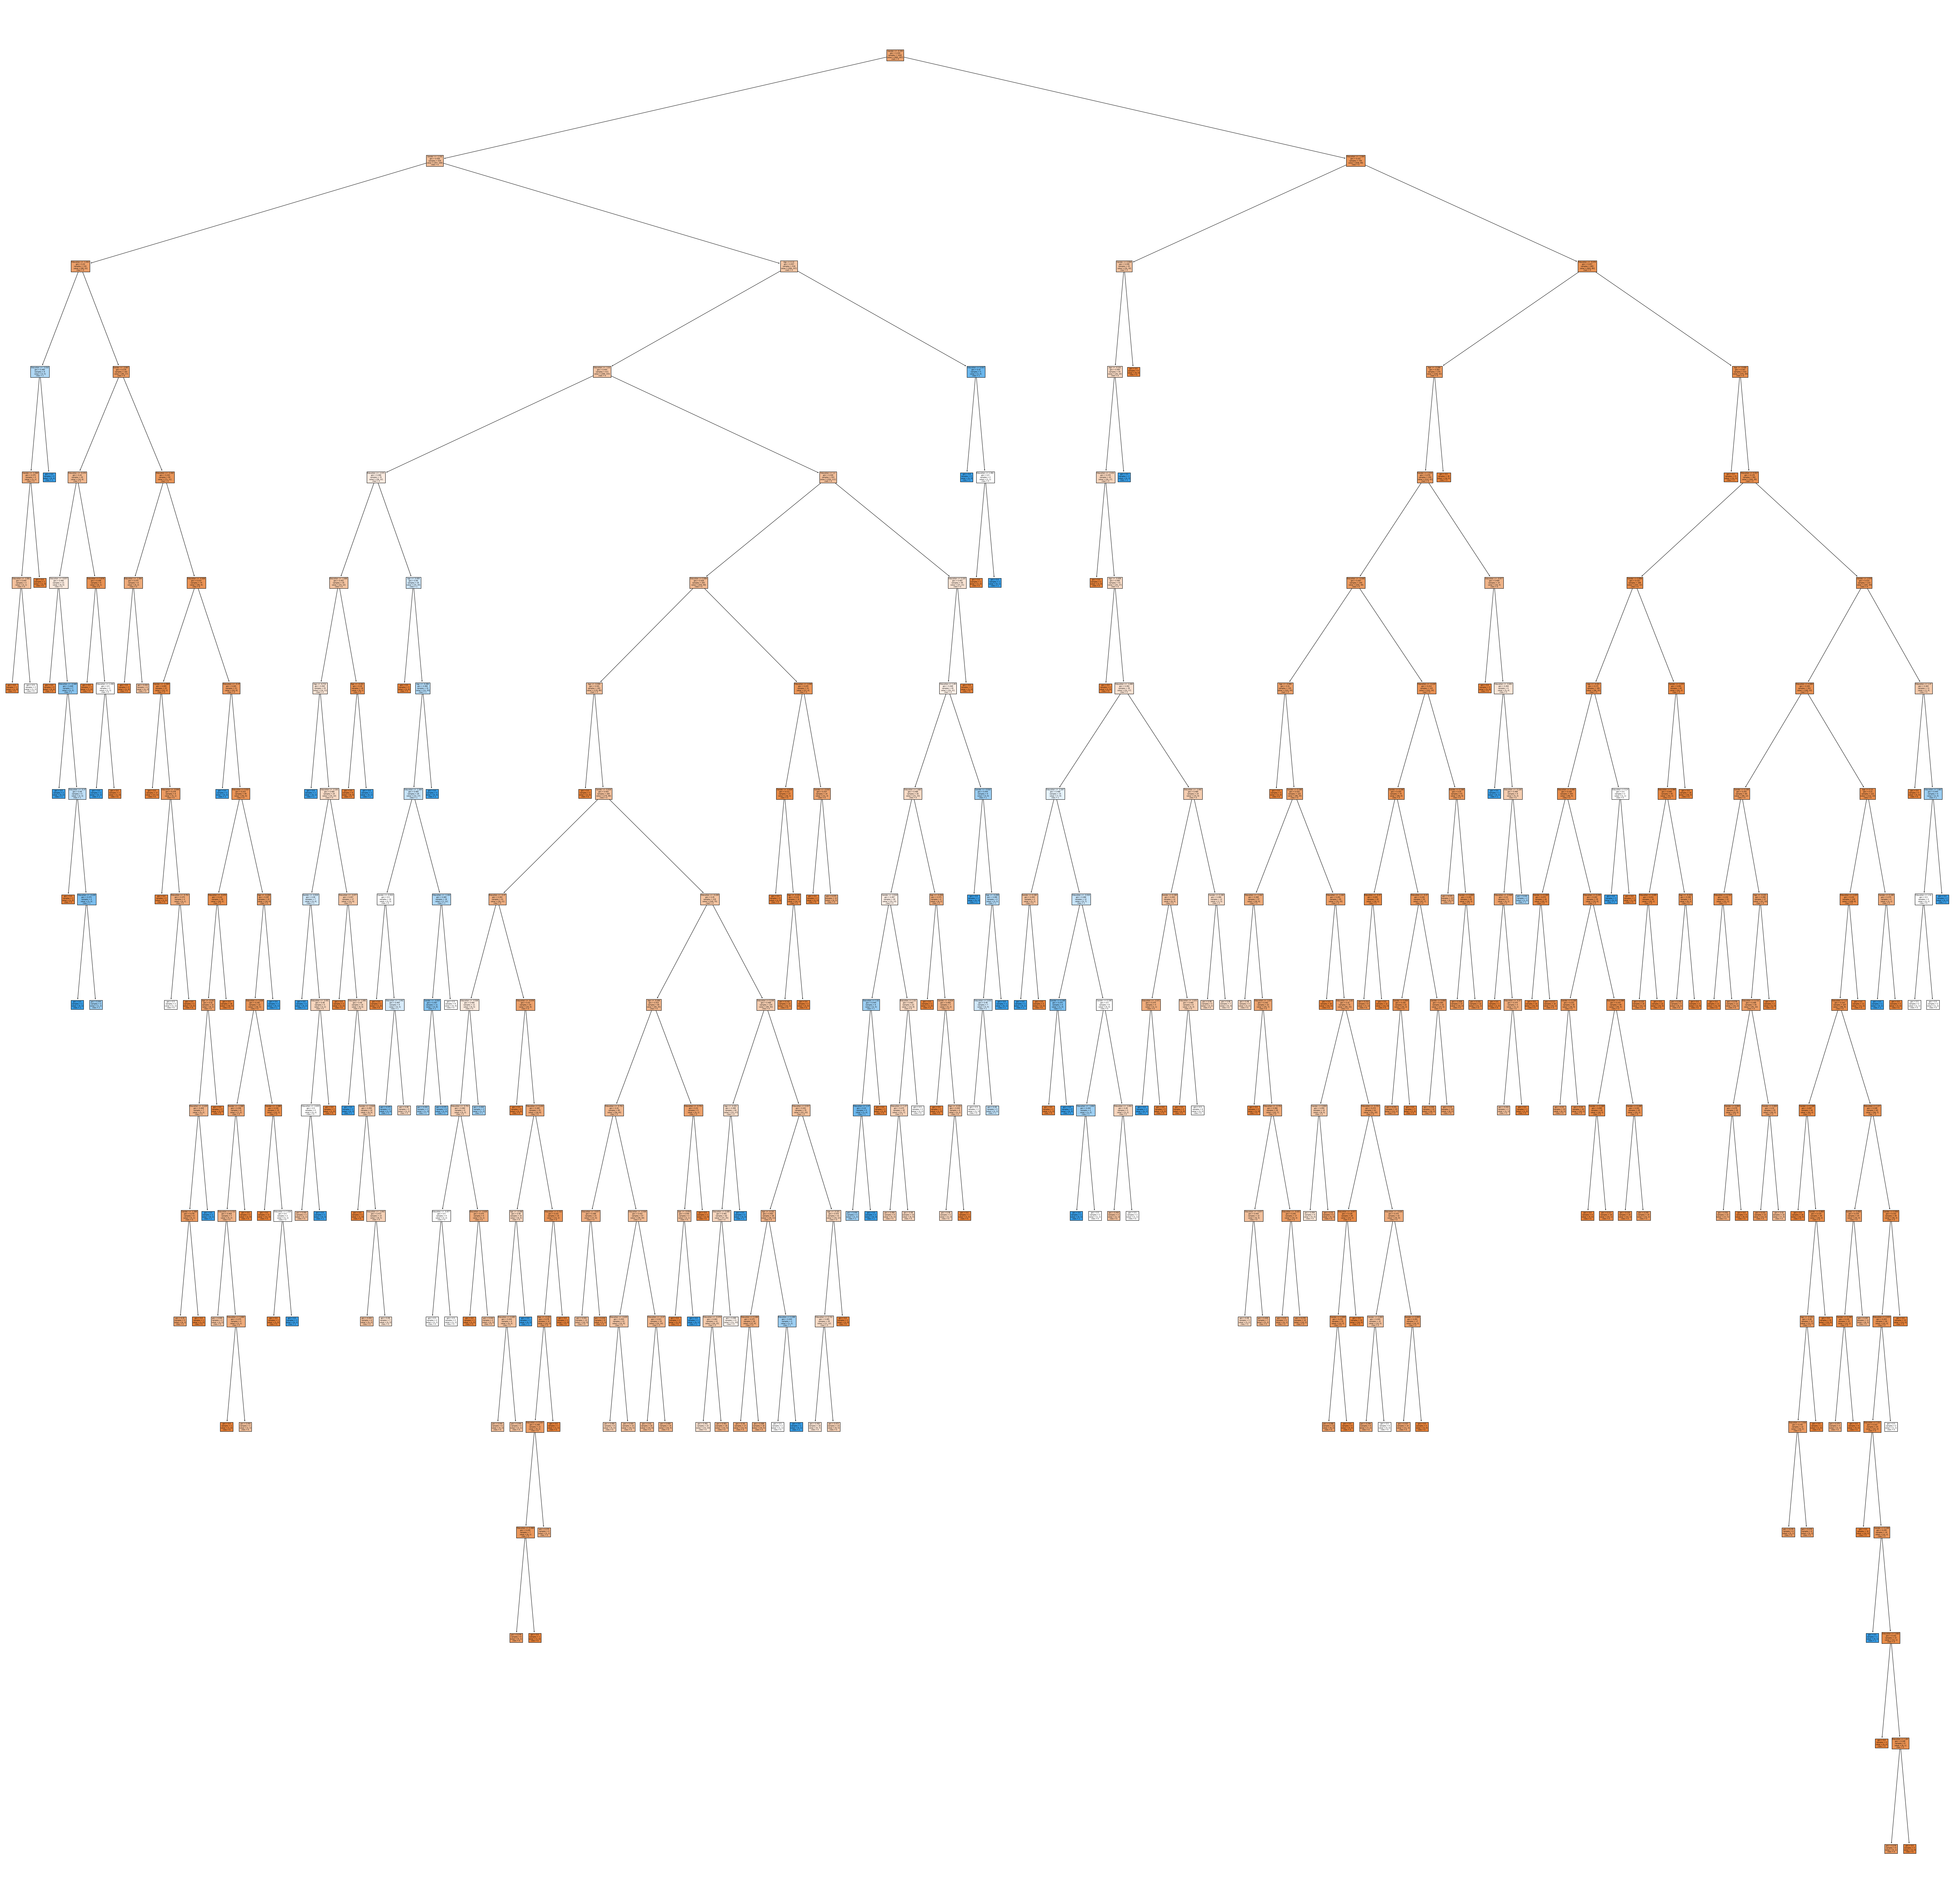

In [102]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(Methadone_DT, 
                   feature_names=input_data.columns,  
                   class_names=['0','1'],
                   filled=True)
fig.savefig("Heroin_DT_decistion_tree.png")

# SVC

In [103]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Methadone_svc = SVC(kernel='sigmoid', C=2)
Methadone_svc.fit(X_train,Y_train)

Methadone_svc_predictions=Methadone_svc.predict(X_test)

Methadone_SVC_accuracy = accuracy_score(Y_test, Methadone_svc_predictions)
Methadone_SVC_precision = precision_score(Y_test, Methadone_svc_predictions)
Methadone_SVC_recall = recall_score(Y_test, Methadone_svc_predictions)

In [104]:
print("Accuracy: ", Methadone_SVC_accuracy,"\nprecision",Methadone_SVC_precision,"\nRecall", Methadone_SVC_recall)


Accuracy:  0.6404494382022472 
precision 0.2357142857142857 
Recall 0.22


# Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier

Methadone_RF=RandomForestClassifier(n_estimators=100, 
                            criterion="entropy")


Methadone_RF.fit(X_train,Y_train)
Methadone_RF_predictions=Methadone_RF.predict(X_test)

Methadone_RF_accuracy = accuracy_score(Y_test, Methadone_RF_predictions)
Methadone_RF_precision = precision_score(Y_test, Methadone_RF_predictions)
Methadone_RF_recall = recall_score(Y_test, Methadone_RF_predictions)


In [106]:
print("Accuracy: ", Methadone_RF_accuracy,"\nprecision",Methadone_RF_precision,"\nRecall", Methadone_RF_recall)


Accuracy:  0.7399678972712681 
precision 0.39285714285714285 
Recall 0.14666666666666667


# KNN 

In [107]:
from sklearn.neighbors import KNeighborsClassifier

Methadone_KNN = KNeighborsClassifier(n_neighbors=10)
Methadone_KNN.fit(X_train,Y_train)
Methadone_KNN_predictions=Methadone_KNN.predict(X_test)

Methadone_KNN_accuracy = accuracy_score(Y_test, Methadone_KNN_predictions)
Methadone_KNN_precision = precision_score(Y_test, Methadone_KNN_predictions)
Methadone_KNN_recall = recall_score(Y_test, Methadone_KNN_predictions)

In [108]:
print("Accuracy: ", Methadone_KNN_accuracy,"\nprecision",Methadone_KNN_precision,"\nRecall", Methadone_KNN_recall)


Accuracy:  0.7576243980738363 
precision 0.4782608695652174 
Recall 0.07333333333333333


[[437  36]
 [130  20]]
[[366 107]
 [117  33]]
[[439  34]
 [128  22]]
[[461  12]
 [139  11]]


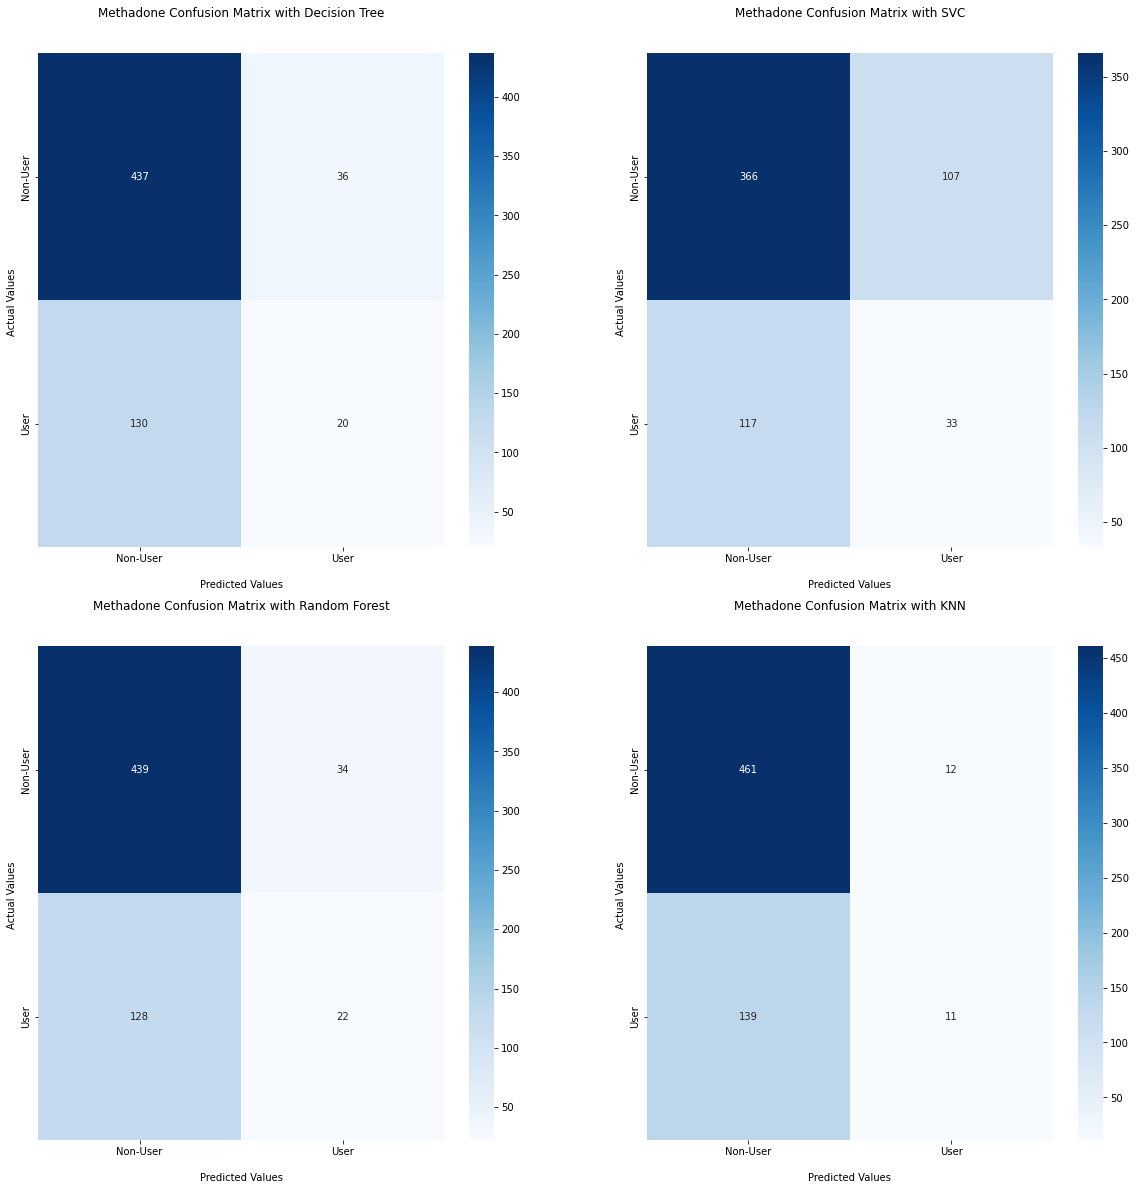

In [109]:
import seaborn as sns
fig = plt.figure(figsize=(20,20))



plt.subplot(2, 2, 1)
cf_matrix_Methadone_DT = confusion_matrix(Y_test, Methadone_DT_predictions)
print(cf_matrix_Methadone_DT)
ax = sns.heatmap(cf_matrix_Methadone_DT, annot=True, cmap='Blues', fmt='g')
ax.set_title('Methadone Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])


plt.subplot(2, 2, 2)
cf_matrix_Methadone_svc = confusion_matrix(Y_test, Methadone_svc_predictions)
print(cf_matrix_Methadone_svc)
ax = sns.heatmap(cf_matrix_Methadone_svc, annot=True, cmap='Blues', fmt='g')
ax.set_title('Methadone Confusion Matrix with SVC\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 3)
cf_matrix_Methadone_RF = confusion_matrix(Y_test, Methadone_RF_predictions)
print(cf_matrix_Methadone_RF)
ax = sns.heatmap(cf_matrix_Methadone_RF, annot=True, cmap='Blues', fmt='g')
ax.set_title('Methadone Confusion Matrix with Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 4)
cf_matrix_Methadone_KNN = confusion_matrix(Y_test, Methadone_KNN_predictions)
print(cf_matrix_Methadone_KNN)
ax = sns.heatmap(cf_matrix_Methadone_KNN, annot=True, cmap='Blues', fmt='g')
ax.set_title('Methadone Confusion Matrix with KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()

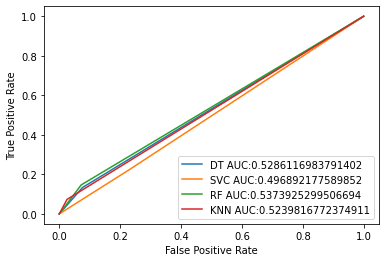

In [111]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# auc scores
# /auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
fpr, tpr, _ = metrics.roc_curve(Y_test,  Methadone_DT_predictions)
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  Methadone_svc_predictions)
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  Methadone_RF_predictions)
fpr3, tpr3, _ = metrics.roc_curve(Y_test,  Methadone_KNN_predictions)
#create ROC curve
plt.plot(fpr,tpr, label="DT AUC:"+str(roc_auc_score(Y_test,  Methadone_DT_predictions)))
plt.plot(fpr1,tpr1, label="SVC AUC:"+str(roc_auc_score(Y_test,  Methadone_svc_predictions)))
plt.plot(fpr2,tpr2, label="RF AUC:"+str(roc_auc_score(Y_test,  Methadone_RF_predictions)))
plt.plot(fpr3,tpr3, label="KNN AUC:"+str(roc_auc_score(Y_test,  Methadone_KNN_predictions)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# LSD

# Feature selection

In [112]:
encoded_data['LSD'] = encoded_data['LSD'].map(change)
encoded_data['LSD'].unique()

encoded_data['LSD'] = encoded_data['LSD'].map(changeBin)
encoded_data['LSD'].unique()



array([0, 1], dtype=int64)

In [113]:
LSD_target_data= encoded_data['LSD']
LSD_target_data



ID
1       0
2       1
3       0
4       0
5       0
       ..
1884    1
1885    1
1886    1
1887    1
1888    1
Name: LSD, Length: 1885, dtype: int64

In [114]:
input_data = encoded_data.iloc[ :, :12]
input_data



Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
1       2       1          5        6          5           27            19   
2       1       0          8        6          2           17            35   
3       2       0          5        6          2           19            28   
4       0       1          7        6          2           22            17   
5       2       1          8        6          2           31            11   
...   ...     ...        ...      ...        ...          ...           ...   
1884    0       1          4        0          2           13            34   
1885    0       0          4        0          2           21            34   
1886    1       1          6        0          2           35            13   
1887    0       1          4        0          2           33             9   
1888    0       0          4        4          2           19            36   

      Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                
1           16             17                 24              3   
2           29             28                 23              2   
3           14             12                 16              1   
4           20             27                 28              1   
5           17             21                 32              3   
...        ...            ...                ...            ...   
1884        31             28                 15              6   
1885        24             28                 12              6   
1886        11             11                 13              5   
1887        22             12                  4              7   
1888        30             30                 27              6   

      Sensation_seeking  
ID                       
1                     2  
2                     5  
3                     7  
4                     2  
5                     5  
...                 ...  
1884                 10  
1885                  8  
1886                  4  
1887                  9  
1888                  9  

[1885 rows x 12 columns]

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data, LSD_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)



(1262, 12) (623, 12) (1262,) (623,)


In [116]:
X_train


Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
956     0       0          5        0          2           41            19   
355     1       0          1        6          2           19            23   
1736    1       1          7        6          2            4            25   
1058    2       1          3        0          2           27            14   
559     1       1          6        6          2            9            29   
...   ...     ...        ...      ...        ...          ...           ...   
984     1       1          6        0          2           30            22   
1505    0       1          6        0          5           19            23   
1160    3       0          5        4          2           19            23   
454     1       0          6        6          2           36            10   
1441    2       1          7        6          2           22            23   

      Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                
956         20             13                  2              8   
355         19             19                 27              5   
1736         4             35                 36              3   
1058        12             11                 13              4   
559         19             32                 32              2   
...        ...            ...                ...            ...   
984         31             11                 31              5   
1505        18             24                 20              7   
1160        18             15                 30              2   
454         18             24                 27              1   
1441        14             28                 27              1   

      Sensation_seeking  
ID                       
956                   9  
355                   3  
1736                  4  
1058                  7  
559                   5  
...                 ...  
984                   9  
1505                  9  
1160                  7  
454                   5  
1441                  2  

[1262 rows x 12 columns]

In [117]:
from sklearn.feature_selection import chi2
import pandas as pd

chi_scores = chi2(X_train,Y_train)

chi_scores



(array([ 12.65492747,  52.75021909,  11.82777789, 464.70979351,
          3.72482237,  34.16092256,  15.73762949, 295.68888648,
         56.44276702,  90.93557952, 111.12567473, 220.04419441]),
 array([3.74577127e-004, 3.78781086e-013, 5.83535916e-004, 4.53910334e-103,
        5.36093297e-002, 5.07376527e-009, 7.27622001e-005, 2.86444271e-066,
        5.78581627e-014, 1.48426615e-021, 5.55360903e-026, 8.84593346e-050]))

In [118]:
p_val = pd.Series(chi_scores[1])
p_val.index = input_data.columns
p_val

Age                   3.745771e-04
Gender                3.787811e-13
Education             5.835359e-04
Country              4.539103e-103
Ethnicity             5.360933e-02
Neuroticism           5.073765e-09
Extraversion          7.276220e-05
Openness              2.864443e-66
Agreeableness         5.785816e-14
Conscientiousness     1.484266e-21
Impulsiveness         5.553609e-26
Sensation_seeking     8.845933e-50
dtype: float64

In [119]:
p_val=p_val.sort_values(ascending=False)
p_val


Ethnicity             5.360933e-02
Education             5.835359e-04
Age                   3.745771e-04
Extraversion          7.276220e-05
Neuroticism           5.073765e-09
Gender                3.787811e-13
Agreeableness         5.785816e-14
Conscientiousness     1.484266e-21
Impulsiveness         5.553609e-26
Sensation_seeking     8.845933e-50
Openness              2.864443e-66
Country              4.539103e-103
dtype: float64

<AxesSubplot:>

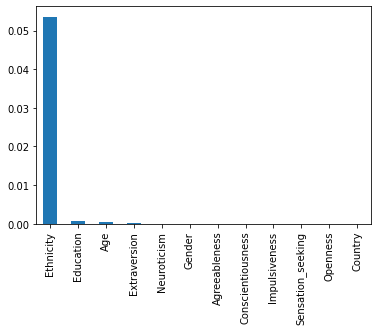

In [120]:

p_val.plot.bar()

In [ ]:
# 'Ethnicity','Education','Age','Extraversion'

In [125]:
LSD_input_data = encoded_data[['Ethnicity','Education','Age','Extraversion']]


In [126]:
LSD_input_data

Ethnicity  Education  Age  Extraversion
ID                                           
1             5          5    2            19
2             2          8    1            35
3             2          5    2            28
4             2          7    0            17
5             2          8    2            11
...         ...        ...  ...           ...
1884          2          4    0            34
1885          2          4    0            34
1886          2          6    1            13
1887          2          4    0             9
1888          2          4    0            36

[1885 rows x 4 columns]

In [127]:
encoded_data['LSD'] = encoded_data['LSD'].map(change)

encoded_data['LSD'].unique()

array([0, 1], dtype=int64)

In [128]:
LSD_target_data= encoded_data['LSD']
LSD_target_data

ID
1       0
2       1
3       0
4       0
5       0
       ..
1884    1
1885    1
1886    1
1887    1
1888    1
Name: LSD, Length: 1885, dtype: int64

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(LSD_input_data, LSD_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1262, 4) (623, 4) (1262,) (623,)


# Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

LSD_DT = DecisionTreeClassifier()
LSD_DT.fit(X_train,Y_train)
LSD_DT_predictions=LSD_DT.predict(X_test)

LSD_DT_accuracy = accuracy_score(Y_test, LSD_DT_predictions)
LSD_DT_precision = precision_score(Y_test, LSD_DT_predictions)
LSD_DT_recall = recall_score(Y_test, LSD_DT_predictions)

In [131]:
print("Accuracy: ", Alcohol_DT_accuracy,"\nprecision",Alcohol_DT_precision,"\nRecall", Alcohol_DT_recall)

Accuracy:  0.956661316211878 
precision 0.9802306425041186 
Recall 0.9754098360655737


# SVC

In [140]:

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

LSD_svc = SVC(random_state = 101)
LSD_svc.fit(X_train,Y_train)

LSD_svc_predictions=LSD_svc.predict(X_test)

LSD_SVC_accuracy = accuracy_score(Y_test, LSD_svc_predictions)
LSD_SVC_precision = precision_score(Y_test, LSD_svc_predictions)
LSD_SVC_recall = recall_score(Y_test, LSD_svc_predictions)

In [141]:
print("Accuracy: ", LSD_SVC_accuracy,"\nprecision",LSD_SVC_precision,"\nRecall", LSD_SVC_recall)


Accuracy:  0.6099518459069021 
precision 0.4838709677419355 
Recall 0.31512605042016806


# Random Classifier

In [150]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
LSD_RF=RandomForestClassifier(n_estimators=100, 
                            max_depth=5,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)

LSD_RF.fit(X_train,Y_train)
LSD_RF_predictions=LSD_RF.predict(X_test)

LSD_RF_accuracy = accuracy_score(Y_test, LSD_RF_predictions)
LSD_RF_precision = precision_score(Y_test, LSD_RF_predictions)
LSD_RF_recall = recall_score(Y_test, LSD_RF_predictions)

In [151]:
print("Accuracy: ", LSD_RF_accuracy,"\nprecision",LSD_RF_precision,"\nRecall", LSD_RF_recall)


Accuracy:  0.6420545746388443 
precision 0.5373134328358209 
Recall 0.453781512605042


# KNN

In [154]:
from sklearn.neighbors import KNeighborsClassifier

LSD_KNN = KNeighborsClassifier(n_neighbors=12)
LSD_KNN.fit(X_train,Y_train)
LSD_KNN_predictions=LSD_KNN.predict(X_test)

LSD_KNN_accuracy = accuracy_score(Y_test, LSD_KNN_predictions)
LSD_KNN_precision = precision_score(Y_test, LSD_KNN_predictions)
LSD_KNN_recall = recall_score(Y_test, LSD_KNN_predictions)



In [155]:
print("Accuracy: ", LSD_KNN_accuracy,"\nprecision",LSD_KNN_precision,"\nRecall", LSD_KNN_recall)

Accuracy:  0.6051364365971108 
precision 0.4797979797979798 
Recall 0.39915966386554624


[[253 132]
 [135 103]]
[[305  80]
 [163  75]]
[[292  93]
 [130 108]]
[[282 103]
 [143  95]]


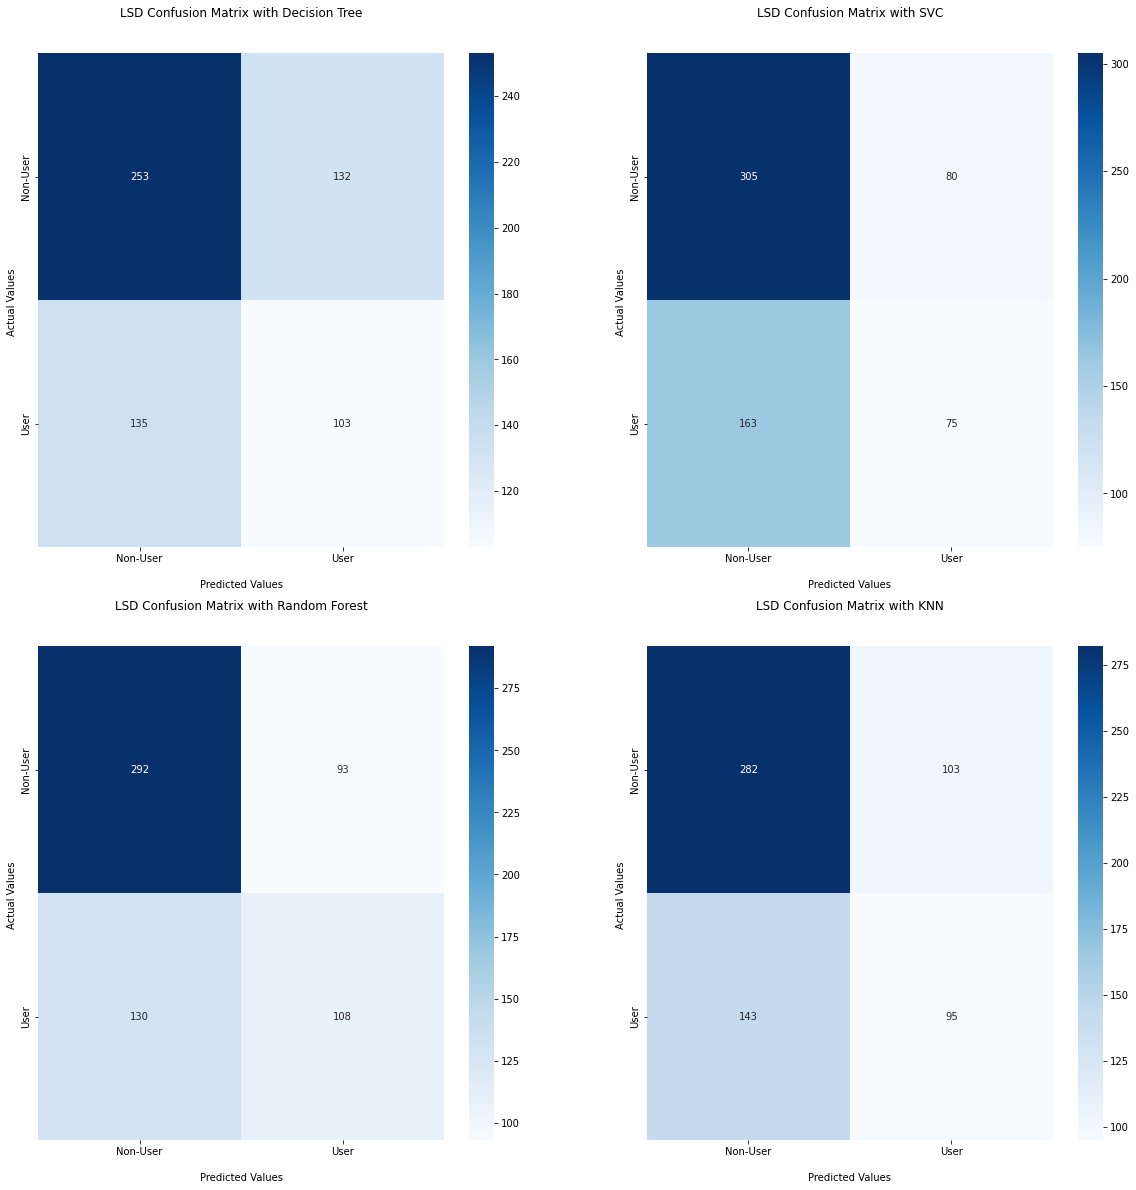

In [156]:
import seaborn as sns
fig = plt.figure(figsize=(20,20))



plt.subplot(2, 2, 1)
cf_matrix_LSD_DT = confusion_matrix(Y_test, LSD_DT_predictions)
print(cf_matrix_LSD_DT)
ax = sns.heatmap(cf_matrix_LSD_DT, annot=True, cmap='Blues', fmt='g')
ax.set_title('LSD Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])


plt.subplot(2, 2, 2)
cf_matrix_LSD_svc = confusion_matrix(Y_test, LSD_svc_predictions)
print(cf_matrix_LSD_svc)
ax = sns.heatmap(cf_matrix_LSD_svc, annot=True, cmap='Blues', fmt='g')
ax.set_title('LSD Confusion Matrix with SVC\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 3)
cf_matrix_LSD_RF = confusion_matrix(Y_test, LSD_RF_predictions)
print(cf_matrix_LSD_RF)
ax = sns.heatmap(cf_matrix_LSD_RF, annot=True, cmap='Blues', fmt='g')
ax.set_title('LSD Confusion Matrix with Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 4)
cf_matrix_LSD_KNN = confusion_matrix(Y_test, LSD_KNN_predictions)
print(cf_matrix_LSD_KNN)
ax = sns.heatmap(cf_matrix_LSD_KNN, annot=True, cmap='Blues', fmt='g')
ax.set_title('LSD Confusion Matrix with KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()


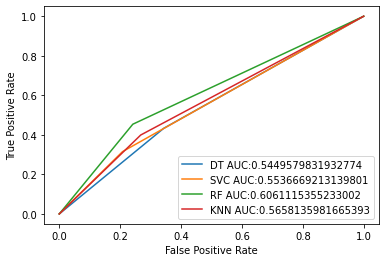

In [157]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  LSD_DT_predictions)
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  LSD_svc_predictions)
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  LSD_RF_predictions)
fpr3, tpr3, _ = metrics.roc_curve(Y_test,  LSD_KNN_predictions)
#create ROC curve
plt.plot(fpr,tpr, label="DT AUC:"+str(roc_auc_score(Y_test,  LSD_DT_predictions)))
plt.plot(fpr1,tpr1, label="SVC AUC:"+str(roc_auc_score(Y_test,  LSD_svc_predictions)))
plt.plot(fpr2,tpr2, label="RF AUC:"+str(roc_auc_score(Y_test,  LSD_RF_predictions)))
plt.plot(fpr3,tpr3, label="KNN AUC:"+str(roc_auc_score(Y_test,  LSD_KNN_predictions)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Cocaine

# Feature Selection

In [158]:
# Feature selection

encoded_data['Cocaine'] = encoded_data['Cocaine'].map(change)
encoded_data['Cocaine'].unique()

encoded_data['Cocaine'] = encoded_data['Cocaine'].map(changeBin)
encoded_data['Cocaine'].unique()



array([0, 1], dtype=int64)

In [159]:
Cocaine_target_data= encoded_data['Cocaine']
Cocaine_target_data


ID
1       0
2       1
3       0
4       1
5       0
       ..
1884    0
1885    0
1886    1
1887    0
1888    1
Name: Cocaine, Length: 1885, dtype: int64

In [160]:

input_data = encoded_data.iloc[ :, :12]
input_data


Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
1       2       1          5        6          5           27            19   
2       1       0          8        6          2           17            35   
3       2       0          5        6          2           19            28   
4       0       1          7        6          2           22            17   
5       2       1          8        6          2           31            11   
...   ...     ...        ...      ...        ...          ...           ...   
1884    0       1          4        0          2           13            34   
1885    0       0          4        0          2           21            34   
1886    1       1          6        0          2           35            13   
1887    0       1          4        0          2           33             9   
1888    0       0          4        4          2           19            36   

      Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                
1           16             17                 24              3   
2           29             28                 23              2   
3           14             12                 16              1   
4           20             27                 28              1   
5           17             21                 32              3   
...        ...            ...                ...            ...   
1884        31             28                 15              6   
1885        24             28                 12              6   
1886        11             11                 13              5   
1887        22             12                  4              7   
1888        30             30                 27              6   

      Sensation_seeking  
ID                       
1                     2  
2                     5  
3                     7  
4                     2  
5                     5  
...                 ...  
1884                 10  
1885                  8  
1886                  4  
1887                  9  
1888                  9  

[1885 rows x 12 columns]

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data, Cocaine_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(1262, 12) (623, 12) (1262,) (623,)


In [162]:
X_train


Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
1549    1       0          6        6          2           13            19   
1059    0       0          6        0          2           31            15   
1073    0       0          4        4          2           19            20   
15      4       1          5        6          2           15            32   
1236    4       0          7        0          2           25            27   
...   ...     ...        ...      ...        ...          ...           ...   
1516    0       0          4        0          2           34            20   
428     3       0          1        6          2           26            23   
386     3       1          6        6          0           21            24   
698     3       1          6        5          4            9            21   
810     0       0          6        0          2           28             9   

      Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                
1549         8             25                 32              1   
1059        11             20                 21              5   
1073        27             24                 13              3   
15          23             19                 34              7   
1236        24             21                 28              3   
...        ...            ...                ...            ...   
1516        20             14                 15              8   
428         18             22                 24              5   
386         13             28                 28              4   
698         27             33                 24              2   
810         13             28                 12              1   

      Sensation_seeking  
ID                       
1549                  3  
1059                  7  
1073                  8  
15                    8  
1236                  3  
...                 ...  
1516                  9  
428                   5  
386                   1  
698                   6  
810                   3  

[1262 rows x 12 columns]

In [163]:
from sklearn.feature_selection import chi2
import pandas as pd

chi_scores = chi2(X_train,Y_train)

chi_scores

(array([  9.32494502,  17.23118011,   6.97237541, 177.74944453,
          0.72829861,  59.46821925,   0.57456566,  88.77672309,
         85.78355588,  81.08312003,  73.6778657 , 116.71424088]),
 array([2.26055103e-03, 3.30959719e-05, 8.27775403e-03, 1.50253510e-40,
        3.93435231e-01, 1.24285109e-14, 4.48450328e-01, 4.41986197e-21,
        2.00748626e-20, 2.16420683e-19, 9.19643611e-18, 3.31557051e-27]))

In [164]:
p_val = pd.Series(chi_scores[1])
p_val.index = input_data.columns
p_val


Age                  2.260551e-03
Gender               3.309597e-05
Education            8.277754e-03
Country              1.502535e-40
Ethnicity            3.934352e-01
Neuroticism          1.242851e-14
Extraversion         4.484503e-01
Openness             4.419862e-21
Agreeableness        2.007486e-20
Conscientiousness    2.164207e-19
Impulsiveness        9.196436e-18
Sensation_seeking    3.315571e-27
dtype: float64

In [167]:
p_val = pd.Series(chi_scores[0])
p_val.index = input_data.columns
p_val


Age                    9.324945
Gender                17.231180
Education              6.972375
Country              177.749445
Ethnicity              0.728299
Neuroticism           59.468219
Extraversion           0.574566
Openness              88.776723
Agreeableness         85.783556
Conscientiousness     81.083120
Impulsiveness         73.677866
Sensation_seeking    116.714241
dtype: float64

In [165]:
p_val=p_val.sort_values(ascending=False)
p_val


Extraversion         4.484503e-01
Ethnicity            3.934352e-01
Education            8.277754e-03
Age                  2.260551e-03
Gender               3.309597e-05
Neuroticism          1.242851e-14
Impulsiveness        9.196436e-18
Conscientiousness    2.164207e-19
Agreeableness        2.007486e-20
Openness             4.419862e-21
Sensation_seeking    3.315571e-27
Country              1.502535e-40
dtype: float64

<AxesSubplot:>

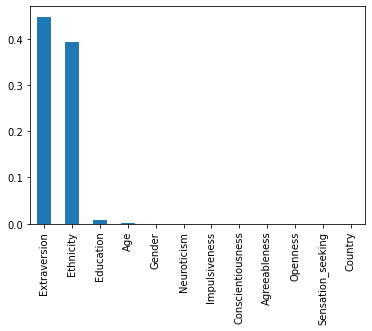

In [166]:
p_val.plot.bar()

In [182]:
Cocaine_input_data = encoded_data[['Neuroticism','Impulsiveness','Conscientiousness','Agreeableness','Openness','Sensation_seeking','Country']]


In [183]:
encoded_data['Cocaine'] = encoded_data['Cocaine'].map(change)

encoded_data['Cocaine'].unique()

array([0, 1], dtype=int64)

In [184]:
Cocaine_target_data= encoded_data['Cocaine']
Cocaine_target_data

ID
1       0
2       1
3       0
4       1
5       0
       ..
1884    0
1885    0
1886    1
1887    0
1888    1
Name: Cocaine, Length: 1885, dtype: int64

In [185]:
input_data

Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
1       2       1          5        6          5           27            19   
2       1       0          8        6          2           17            35   
3       2       0          5        6          2           19            28   
4       0       1          7        6          2           22            17   
5       2       1          8        6          2           31            11   
...   ...     ...        ...      ...        ...          ...           ...   
1884    0       1          4        0          2           13            34   
1885    0       0          4        0          2           21            34   
1886    1       1          6        0          2           35            13   
1887    0       1          4        0          2           33             9   
1888    0       0          4        4          2           19            36   

      Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                
1           16             17                 24              3   
2           29             28                 23              2   
3           14             12                 16              1   
4           20             27                 28              1   
5           17             21                 32              3   
...        ...            ...                ...            ...   
1884        31             28                 15              6   
1885        24             28                 12              6   
1886        11             11                 13              5   
1887        22             12                  4              7   
1888        30             30                 27              6   

      Sensation_seeking  
ID                       
1                     2  
2                     5  
3                     7  
4                     2  
5                     5  
...                 ...  
1884                 10  
1885                  8  
1886                  4  
1887                  9  
1888                  9  

[1885 rows x 12 columns]

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(Cocaine_input_data, Cocaine_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1262, 7) (623, 7) (1262,) (623,)


# Decision Tree

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Cocaine_DT = DecisionTreeClassifier()
Cocaine_DT.fit(X_train,Y_train)
Cocaine_DT_predictions=Cocaine_DT.predict(X_test)

Cocaine_DT_accuracy = accuracy_score(Y_test, Cocaine_DT_predictions)
Cocaine_DT_precision = precision_score(Y_test, Cocaine_DT_predictions)
Cocaine_DT_recall = recall_score(Y_test, Cocaine_DT_predictions)

NameError: name 'X_train' is not defined

In [1]:
print("Accuracy: ", Cocaine_DT_accuracy,"\nprecision",Cocaine_DT_precision,"\nRecall", Cocaine_DT_recall)

NameError: name 'Cocaine_DT_accuracy' is not defined

# SVC

In [192]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Cocaine_svc = SVC(kernel='linear', C=2)
Cocaine_svc.fit(X_train,Y_train)

Cocaine_svc_predictions=Cocaine_svc.predict(X_test)

Cocaine_SVC_accuracy = accuracy_score(Y_test, Cocaine_svc_predictions)
Cocaine_SVC_precision = precision_score(Y_test, Cocaine_svc_predictions)
Cocaine_SVC_recall = recall_score(Y_test, Cocaine_svc_predictions)

In [193]:
print("Accuracy: ", Cocaine_SVC_accuracy,"\nprecision",Cocaine_SVC_precision,"\nRecall", Cocaine_SVC_recall)

Accuracy:  0.6115569823434992 
precision 0.5872340425531914 
Recall 0.4876325088339223


# Random Forest

In [194]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
Cocaine_RF=RandomForestClassifier(n_estimators=100, 
                            max_depth=5,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)


Cocaine_RF.fit(X_train,Y_train)
Cocaine_RF_predictions=Cocaine_RF.predict(X_test)

Cocaine_RF_accuracy = accuracy_score(Y_test, Cocaine_RF_predictions)
Cocaine_RF_precision = precision_score(Y_test, Cocaine_RF_predictions)
Cocaine_RF_recall = recall_score(Y_test, Cocaine_RF_predictions)
#Train the model using the training sets y_pred=clf.predict(X_test)

In [195]:
print("Accuracy: ", Cocaine_RF_accuracy,"\nprecision",Cocaine_RF_precision,"\nRecall", Cocaine_RF_recall)

Accuracy:  0.6773675762439807 
precision 0.6394557823129252 
Recall 0.6643109540636042


# KNN

In [198]:
from sklearn.neighbors import KNeighborsClassifier

Cocaine_KNN = KNeighborsClassifier(n_neighbors=10)
Cocaine_KNN.fit(X_train,Y_train)
Cocaine_KNN_predictions=Cocaine_KNN.predict(X_test)

Cocaine_KNN_accuracy = accuracy_score(Y_test, Cocaine_KNN_predictions)
Cocaine_KNN_precision = precision_score(Y_test, Cocaine_KNN_predictions)
Cocaine_KNN_recall = recall_score(Y_test, Cocaine_KNN_predictions)

In [199]:
print("Accuracy: ", Cocaine_KNN_accuracy,"\nprecision",Cocaine_KNN_precision,"\nRecall", Cocaine_KNN_recall)

Accuracy:  0.622792937399679 
precision 0.6212121212121212 
Recall 0.43462897526501765


[[211 129]
 [130 153]]
[[243  97]
 [145 138]]
[[234 106]
 [ 95 188]]
[[265  75]
 [160 123]]


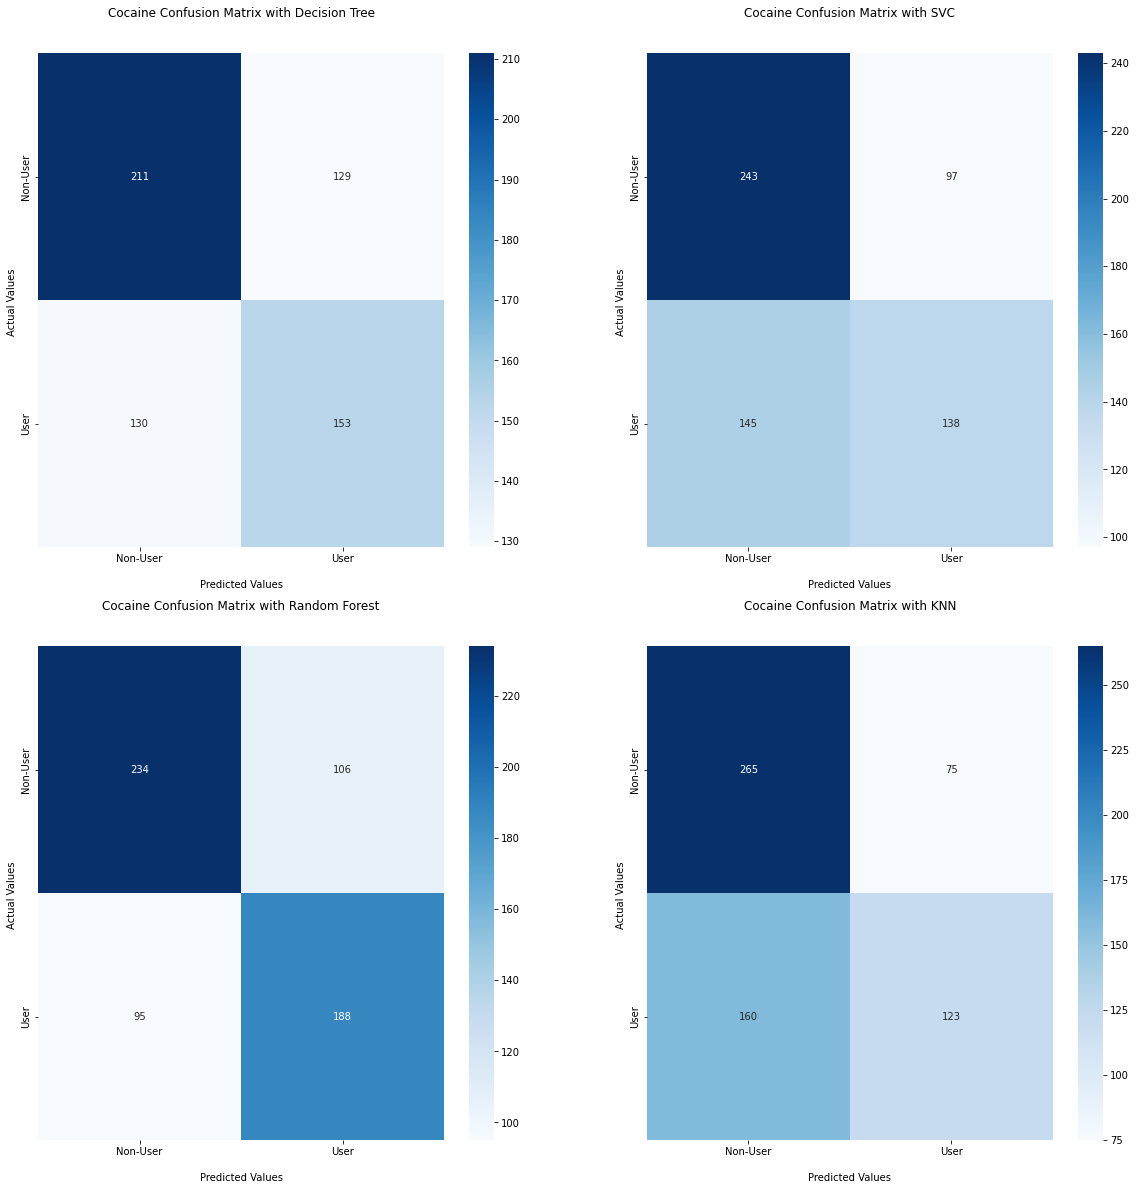

In [200]:
import seaborn as sns
fig = plt.figure(figsize=(20,20))


plt.subplot(2, 2, 1)
cf_matrix_Cocaine_DT = confusion_matrix(Y_test, Cocaine_DT_predictions)
print(cf_matrix_Cocaine_DT)
ax = sns.heatmap(cf_matrix_Cocaine_DT, annot=True, cmap='Blues', fmt='g')
ax.set_title('Cocaine Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])


plt.subplot(2, 2, 2)
cf_matrix_Cocaine_svc = confusion_matrix(Y_test, Cocaine_svc_predictions)
print(cf_matrix_Cocaine_svc)
ax = sns.heatmap(cf_matrix_Cocaine_svc, annot=True, cmap='Blues', fmt='g')
ax.set_title('Cocaine Confusion Matrix with SVC\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 3)
cf_matrix_Cocaine_RF = confusion_matrix(Y_test, Cocaine_RF_predictions)
print(cf_matrix_Cocaine_RF)
ax = sns.heatmap(cf_matrix_Cocaine_RF, annot=True, cmap='Blues', fmt='g')
ax.set_title('Cocaine Confusion Matrix with Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 4)
cf_matrix_Cocaine_KNN = confusion_matrix(Y_test, Cocaine_KNN_predictions)
print(cf_matrix_Cocaine_KNN)
ax = sns.heatmap(cf_matrix_Cocaine_KNN, annot=True, cmap='Blues', fmt='g')
ax.set_title('Cocaine Confusion Matrix with KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()



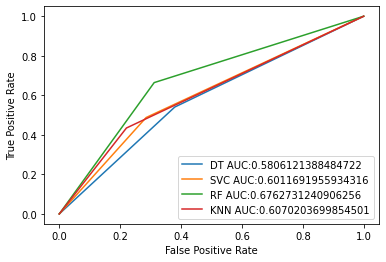

In [201]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Cocaine_DT_predictions)
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  Cocaine_svc_predictions)
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  Cocaine_RF_predictions)
fpr3, tpr3, _ = metrics.roc_curve(Y_test,  Cocaine_KNN_predictions)
#create ROC curve
plt.plot(fpr,tpr, label="DT AUC:"+str(roc_auc_score(Y_test,  Cocaine_DT_predictions)))
plt.plot(fpr1,tpr1, label="SVC AUC:"+str(roc_auc_score(Y_test,  Cocaine_svc_predictions)))
plt.plot(fpr2,tpr2, label="RF AUC:"+str(roc_auc_score(Y_test,  Cocaine_RF_predictions)))
plt.plot(fpr3,tpr3, label="KNN AUC:"+str(roc_auc_score(Y_test,  Cocaine_KNN_predictions)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Cannabis

In [217]:
# Feature selection

encoded_data['Cannabis'] = encoded_data['Cannabis'].map(change)
encoded_data['Cannabis'].unique()

encoded_data['Cannabis'] = encoded_data['Cannabis'].map(changeBin)
encoded_data['Cannabis'].unique()


array([0, 1], dtype=int64)

In [218]:



Cannabis_target_data= encoded_data['Cannabis']
Cannabis_target_data



ID
1       0
2       1
3       1
4       1
5       1
       ..
1884    1
1885    1
1886    1
1887    1
1888    1
Name: Cannabis, Length: 1885, dtype: int64

In [219]:


input_data = encoded_data.iloc[ :, :12]
input_data


Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
1       2       1          5        6          5           27            19   
2       1       0          8        6          2           17            35   
3       2       0          5        6          2           19            28   
4       0       1          7        6          2           22            17   
5       2       1          8        6          2           31            11   
...   ...     ...        ...      ...        ...          ...           ...   
1884    0       1          4        0          2           13            34   
1885    0       0          4        0          2           21            34   
1886    1       1          6        0          2           35            13   
1887    0       1          4        0          2           33             9   
1888    0       0          4        4          2           19            36   

      Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                
1           16             17                 24              3   
2           29             28                 23              2   
3           14             12                 16              1   
4           20             27                 28              1   
5           17             21                 32              3   
...        ...            ...                ...            ...   
1884        31             28                 15              6   
1885        24             28                 12              6   
1886        11             11                 13              5   
1887        22             12                  4              7   
1888        30             30                 27              6   

      Sensation_seeking  
ID                       
1                     2  
2                     5  
3                     7  
4                     2  
5                     5  
...                 ...  
1884                 10  
1885                  8  
1886                  4  
1887                  9  
1888                  9  

[1885 rows x 12 columns]

In [220]:


X_train, X_test, Y_train, Y_test = train_test_split(input_data, Cannabis_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)



(1262, 12) (623, 12) (1262,) (623,)


In [221]:

X_train




Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
361     1       1          4        6          2           18            33   
1578    1       1          7        6          2           21            28   
1094    3       1          1        6          2           19            27   
1767    1       1          6        0          2           32            14   
1478    0       0          4        0          2           28            18   
...   ...     ...        ...      ...        ...          ...           ...   
386     3       1          6        6          0           21            24   
1625    2       0          4        6          2           16            26   
1025    0       0          4        0          2           17            21   
825     0       0          4        2          6           24            21   
389     1       0          6        6          0           12            25   

      Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                
361         24             24                 27              7   
1578        16             32                 30              4   
1094        12             30                 25              4   
1767        28             38                 26              2   
1478        20             21                 14              1   
...        ...            ...                ...            ...   
386         13             28                 28              4   
1625        20             24                 25              3   
1025        27             16                  5              7   
825         19              9                  8              7   
389         16             14                 36              2   

      Sensation_seeking  
ID                       
361                  10  
1578                  3  
1094                  4  
1767                  4  
1478                  7  
...                 ...  
386                   1  
1625                  6  
1025                  8  
825                   9  
389                   6  

[1262 rows x 12 columns]

In [222]:
from sklearn.feature_selection import chi2
import pandas as pd

chi_scores = chi2(X_train,Y_train)

chi_scores



(array([111.56203998,  35.41822667,   6.06206265, 275.38374202,
          3.32566265,  58.91180204,   7.58022036, 278.47624011,
         59.35552163, 172.82960634, 113.14806236, 251.86514735]),
 array([4.45639230e-26, 2.65986134e-09, 1.38116276e-02, 7.61356650e-62,
        6.82065235e-02, 1.64900166e-14, 5.90122258e-03, 1.61306919e-62,
        1.31610383e-14, 1.78312309e-39, 2.00248827e-26, 1.01818492e-56]))

In [223]:
p_val = pd.Series(chi_scores[1])
p_val.index = input_data.columns
p_val




Age                  4.456392e-26
Gender               2.659861e-09
Education            1.381163e-02
Country              7.613567e-62
Ethnicity            6.820652e-02
Neuroticism          1.649002e-14
Extraversion         5.901223e-03
Openness             1.613069e-62
Agreeableness        1.316104e-14
Conscientiousness    1.783123e-39
Impulsiveness        2.002488e-26
Sensation_seeking    1.018185e-56
dtype: float64

In [224]:
p_val=p_val.sort_values(ascending=False)
p_val


Ethnicity            6.820652e-02
Education            1.381163e-02
Extraversion         5.901223e-03
Gender               2.659861e-09
Neuroticism          1.649002e-14
Agreeableness        1.316104e-14
Age                  4.456392e-26
Impulsiveness        2.002488e-26
Conscientiousness    1.783123e-39
Sensation_seeking    1.018185e-56
Country              7.613567e-62
Openness             1.613069e-62
dtype: float64

<AxesSubplot:>

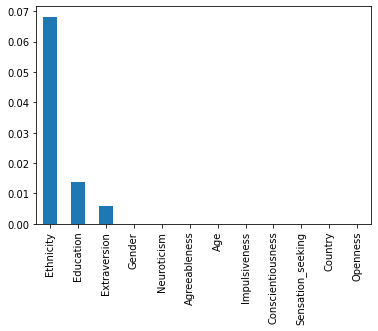

In [225]:
p_val.plot.bar()

In [226]:
Cannabis_input_data = encoded_data[['Ethnicity','Education','Extraversion']]


encoded_data['Cannabis'] = encoded_data['Cannabis'].map(change)

encoded_data['Cannabis'].unique()

Cannabis_target_data= encoded_data['Cannabis']
Cannabis_target_data

ID
1       0
2       1
3       1
4       1
5       1
       ..
1884    1
1885    1
1886    1
1887    1
1888    1
Name: Cannabis, Length: 1885, dtype: int64

In [227]:
X_train, X_test, Y_train, Y_test = train_test_split(Cannabis_input_data, Cannabis_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1262, 3) (623, 3) (1262,) (623,)


# Decision Tree

In [228]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Cannabis_DT = DecisionTreeClassifier()
Cannabis_DT.fit(X_train,Y_train)
Cannabis_DT_predictions=Cannabis_DT.predict(X_test)

Cannabis_DT_accuracy = accuracy_score(Y_test, Cannabis_DT_predictions)
Cannabis_DT_precision = precision_score(Y_test, Cannabis_DT_predictions)
Cannabis_DT_recall = recall_score(Y_test, Cannabis_DT_predictions)

In [229]:
 print("Accuracy: ", Alcohol_DT_accuracy,"\nprecision",Alcohol_DT_precision,"\nRecall", Alcohol_DT_recall)

Accuracy:  0.956661316211878 
precision 0.9802306425041186 
Recall 0.9754098360655737


# SVC

In [230]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Cannabis_svc = SVC(random_state = 42)
Cannabis_svc.fit(X_train,Y_train)

Cannabis_svc_predictions=Cannabis_svc.predict(X_test)

Cannabis_SVC_accuracy = accuracy_score(Y_test, Cannabis_svc_predictions)
Cannabis_SVC_precision = precision_score(Y_test, Cannabis_svc_predictions)
Cannabis_SVC_recall = recall_score(Y_test, Cannabis_svc_predictions)

In [231]:
print("Accuracy: ", Cannabis_SVC_accuracy,"\nprecision",Cannabis_SVC_precision,"\nRecall", Cannabis_SVC_recall)

Accuracy:  0.7512038523274478 
precision 0.7512038523274478 
Recall 1.0


# Random Forest

In [232]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
Cannabis_RF=RandomForestClassifier(n_estimators=100, 
                            max_depth=3,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)


Cannabis_RF.fit(X_train,Y_train)
Cannabis_RF_predictions=Cannabis_RF.predict(X_test)

Cannabis_RF_accuracy = accuracy_score(Y_test, Cannabis_RF_predictions)
Cannabis_RF_precision = precision_score(Y_test, Cannabis_RF_predictions)
Cannabis_RF_recall = recall_score(Y_test, Cannabis_RF_predictions)
#Train the model using the training sets y_pred=clf.predict(X_test)


In [233]:
print("Accuracy: ", Cannabis_RF_accuracy,"\nprecision",Cannabis_RF_precision,"\nRecall", Cannabis_RF_recall)

Accuracy:  0.7608346709470305 
precision 0.7627677100494233 
Recall 0.9893162393162394


# KNN

In [234]:
from sklearn.neighbors import KNeighborsClassifier

Cannabis_KNN = KNeighborsClassifier(n_neighbors=6)
Cannabis_KNN.fit(X_train,Y_train)
Cannabis_KNN_predictions=Cannabis_KNN.predict(X_test)

Cannabis_KNN_accuracy = accuracy_score(Y_test, Cannabis_KNN_predictions)
Cannabis_KNN_precision = precision_score(Y_test, Cannabis_KNN_predictions)
Cannabis_KNN_recall = recall_score(Y_test, Cannabis_KNN_predictions)

print("Accuracy: ", Cannabis_KNN_accuracy,"\nprecision",Cannabis_KNN_precision,"\nRecall", Cannabis_KNN_recall)

Accuracy:  0.7174959871589085 
precision 0.7654545454545455 
Recall 0.8995726495726496


[[ 31 124]
 [ 56 412]]
[[  0 155]
 [  0 468]]
[[ 11 144]
 [  5 463]]
[[ 26 129]
 [ 47 421]]


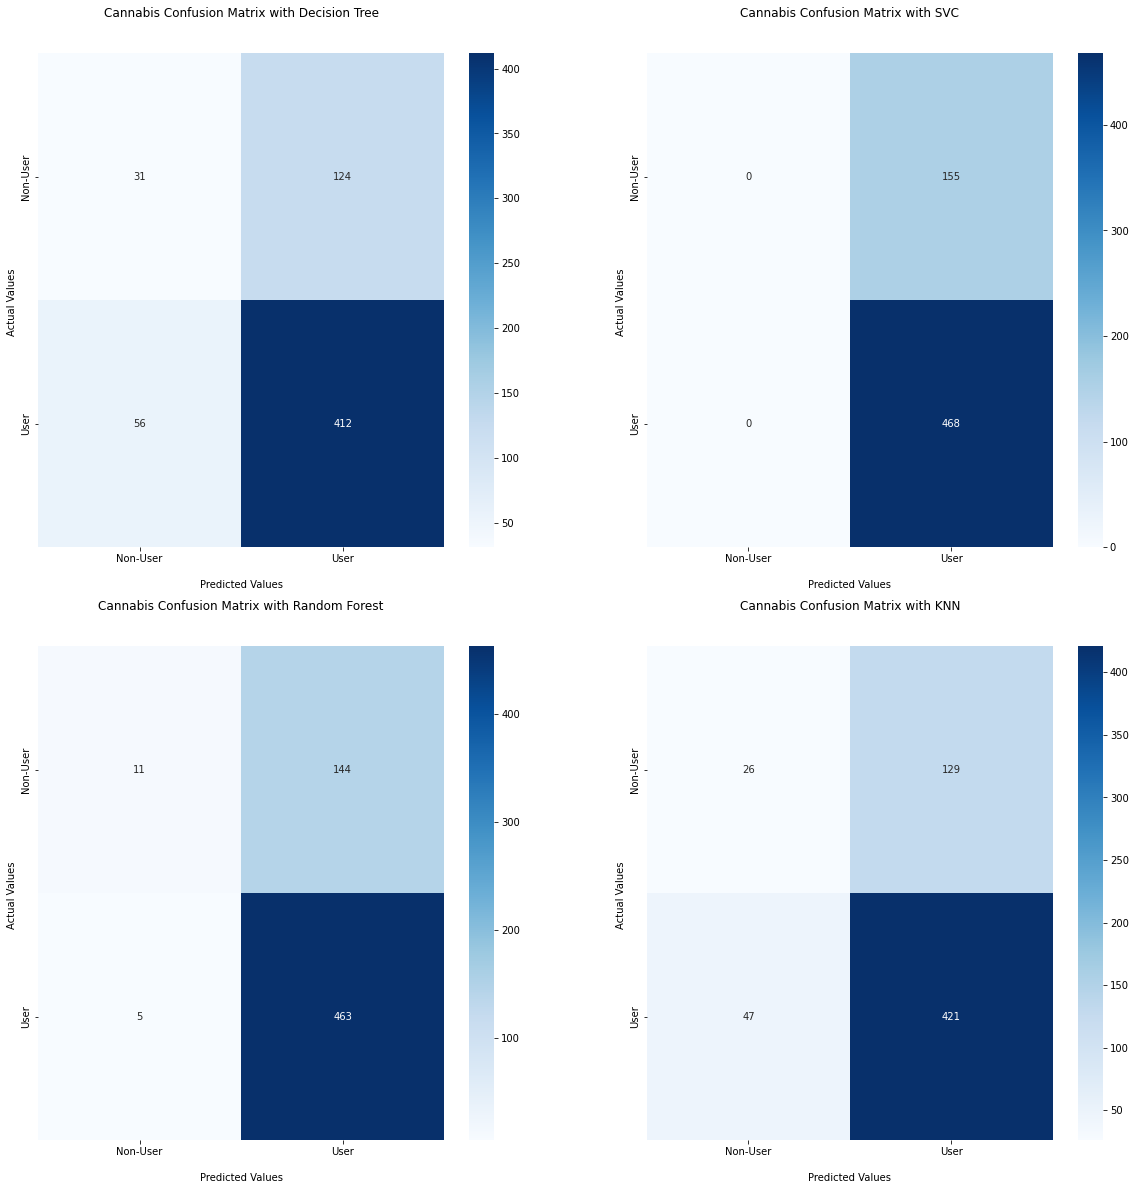

In [235]:
import seaborn as sns
fig = plt.figure(figsize=(20,20))


plt.subplot(2, 2, 1)
cf_matrix_Cannabis_DT = confusion_matrix(Y_test, Cannabis_DT_predictions)
print(cf_matrix_Cannabis_DT)
ax = sns.heatmap(cf_matrix_Cannabis_DT, annot=True, cmap='Blues', fmt='g')
ax.set_title('Cannabis Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])


plt.subplot(2, 2, 2)
cf_matrix_Cannabis_svc = confusion_matrix(Y_test, Cannabis_svc_predictions)
print(cf_matrix_Cannabis_svc)
ax = sns.heatmap(cf_matrix_Cannabis_svc, annot=True, cmap='Blues', fmt='g')
ax.set_title('Cannabis Confusion Matrix with SVC\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 3)
cf_matrix_Cannabis_RF = confusion_matrix(Y_test, Cannabis_RF_predictions)
print(cf_matrix_Cannabis_RF)
ax = sns.heatmap(cf_matrix_Cannabis_RF, annot=True, cmap='Blues', fmt='g')
ax.set_title('Cannabis Confusion Matrix with Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 4)
cf_matrix_Cannabis_KNN = confusion_matrix(Y_test, Cannabis_KNN_predictions)
print(cf_matrix_Cannabis_KNN)
ax = sns.heatmap(cf_matrix_Cannabis_KNN, annot=True, cmap='Blues', fmt='g')
ax.set_title('Cannabis Confusion Matrix with KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()


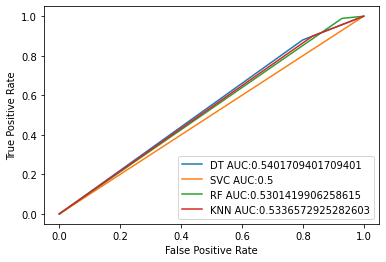

In [236]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Cannabis_DT_predictions)
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  Cannabis_svc_predictions)
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  Cannabis_RF_predictions)
fpr3, tpr3, _ = metrics.roc_curve(Y_test,  Cannabis_KNN_predictions)
#create ROC curve
plt.plot(fpr,tpr, label="DT AUC:"+str(roc_auc_score(Y_test,  Cannabis_DT_predictions)))
plt.plot(fpr1,tpr1, label="SVC AUC:"+str(roc_auc_score(Y_test,  Cannabis_svc_predictions)))
plt.plot(fpr2,tpr2, label="RF AUC:"+str(roc_auc_score(Y_test,  Cannabis_RF_predictions)))
plt.plot(fpr3,tpr3, label="KNN AUC:"+str(roc_auc_score(Y_test,  Cannabis_KNN_predictions)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Ecstasy

In [237]:
encoded_data['Ecstasy'] = encoded_data['Ecstasy'].map(change)
encoded_data['Ecstasy'].unique()

encoded_data['Ecstasy'] = encoded_data['Ecstasy'].map(changeBin)
encoded_data['Ecstasy'].unique()

Ecstasy_target_data= encoded_data['Ecstasy']
Ecstasy_target_data

input_data = encoded_data.iloc[ :, :12]
input_data

X_train, X_test, Y_train, Y_test = train_test_split(input_data, Ecstasy_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

X_train



(1262, 12) (623, 12) (1262,) (623,)


Age  Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
ID                                                                            
1063    0       1          6        0          6           36            35   
756     0       0          4        0          2           11            33   
278     1       0          4        6          2           14            32   
1181    0       0          4        0          2           16            21   
1434    1       1          7        6          3           27            16   
...   ...     ...        ...      ...        ...          ...           ...   
761     1       0          6        5          2           24            16   
1403    1       1          6        6          2           33            23   
616     1       1          0        0          2           21            27   
1640    3       1          5        6          2           23            24   
1721    1       1          6        6          2           28            30   

      Openness  Agreeableness  Conscientiousness  Impulsiveness  \
ID                                                                
1063        30             22                 20              7   
756         30             28                 38              2   
278         27             28                 23              5   
1181        16             28                 22              3   
1434        16             38                 33              1   
...        ...            ...                ...            ...   
761         14             20                 19              4   
1403        26             29                 20              1   
616         15             17                 26              7   
1640        13             22                 22              4   
1721        12             37                 32              1   

      Sensation_seeking  
ID                       
1063                  9  
756                   2  
278                   6  
1181                  2  
1434                  2  
...                 ...  
761                   9  
1403                  6  
616                   5  
1640                  2  
1721                  1  

[1262 rows x 12 columns]

In [238]:
from sklearn.feature_selection import chi2
import pandas as pd

chi_scores = chi2(X_train,Y_train)

chi_scores


(array([130.69173244,  30.70930246,  13.83223392, 235.84193819,
          0.91355554,  32.08162996,   2.37662393, 220.11667973,
         28.33390705, 148.55222919, 114.11899509, 210.29563992]),
 array([2.89204558e-30, 2.99724673e-08, 1.99877601e-04, 3.17234947e-53,
        3.39172787e-01, 1.47828546e-08, 1.23163462e-01, 8.52968115e-50,
        1.02091996e-07, 3.59267470e-34, 1.22718635e-26, 1.18403834e-47]))

In [239]:
p_val = pd.Series(chi_scores[1])
p_val.index = input_data.columns
p_val


Age                  2.892046e-30
Gender               2.997247e-08
Education            1.998776e-04
Country              3.172349e-53
Ethnicity            3.391728e-01
Neuroticism          1.478285e-08
Extraversion         1.231635e-01
Openness             8.529681e-50
Agreeableness        1.020920e-07
Conscientiousness    3.592675e-34
Impulsiveness        1.227186e-26
Sensation_seeking    1.184038e-47
dtype: float64

In [240]:
p_val=p_val.sort_values(ascending=False)
p_val


Ethnicity            3.391728e-01
Extraversion         1.231635e-01
Education            1.998776e-04
Agreeableness        1.020920e-07
Gender               2.997247e-08
Neuroticism          1.478285e-08
Impulsiveness        1.227186e-26
Age                  2.892046e-30
Conscientiousness    3.592675e-34
Sensation_seeking    1.184038e-47
Openness             8.529681e-50
Country              3.172349e-53
dtype: float64

<AxesSubplot:>

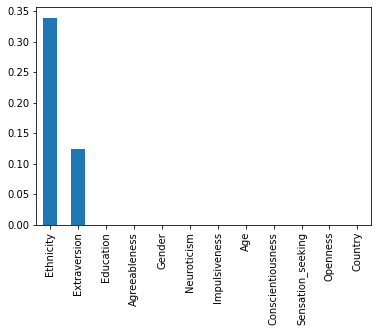

In [241]:


p_val.plot.bar()

In [ ]:
'Ethnicity','Education','Extraversion'

In [242]:
Ecstasy_input_data = encoded_data[['Ethnicity','Education','Extraversion']]


encoded_data['Ecstasy'] = encoded_data['Ecstasy'].map(change)

encoded_data['Ecstasy'].unique()

Ecstasy_target_data= encoded_data['Ecstasy']
Ecstasy_target_data

ID
1       0
2       1
3       0
4       0
5       1
       ..
1884    0
1885    1
1886    1
1887    1
1888    1
Name: Ecstasy, Length: 1885, dtype: int64

In [243]:
X_train, X_test, Y_train, Y_test = train_test_split(Ecstasy_input_data, Ecstasy_target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1262, 3) (623, 3) (1262,) (623,)


# Decision Tree

In [244]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Ecstasy_DT = DecisionTreeClassifier()
Ecstasy_DT.fit(X_train,Y_train)
Ecstasy_DT_predictions=Ecstasy_DT.predict(X_test)

Ecstasy_DT_accuracy = accuracy_score(Y_test, Ecstasy_DT_predictions)
Ecstasy_DT_precision = precision_score(Y_test, Ecstasy_DT_predictions)
Ecstasy_DT_recall = recall_score(Y_test, Ecstasy_DT_predictions)

In [245]:
print("Accuracy: ", Alcohol_DT_accuracy,"\nprecision",Alcohol_DT_precision,"\nRecall", Alcohol_DT_recall)

Accuracy:  0.956661316211878 
precision 0.9802306425041186 
Recall 0.9754098360655737


# SVC

In [250]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Ecstasy_svc = SVC(kernel='sigmoid', C=2)
Ecstasy_svc.fit(X_train,Y_train)

Ecstasy_svc_predictions=Ecstasy_svc.predict(X_test)

Ecstasy_SVC_accuracy = accuracy_score(Y_test, Ecstasy_svc_predictions)
Ecstasy_SVC_precision = precision_score(Y_test, Ecstasy_svc_predictions)
Ecstasy_SVC_recall = recall_score(Y_test, Ecstasy_svc_predictions)

In [251]:
print("Accuracy: ", Ecstasy_SVC_accuracy,"\nprecision",Ecstasy_SVC_precision,"\nRecall", Ecstasy_SVC_recall)

Accuracy:  0.5248796147672552 
precision 0.45806451612903226 
Recall 0.5259259259259259


# Random Forest

In [252]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
Ecstasy_RF=RandomForestClassifier(n_estimators=100, 
                            max_depth=6,
                            max_features='auto', 
                            min_samples_leaf=6,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)


Ecstasy_RF.fit(X_train,Y_train)
Ecstasy_RF_predictions=Ecstasy_RF.predict(X_test)

Ecstasy_RF_accuracy = accuracy_score(Y_test, Ecstasy_RF_predictions)
Ecstasy_RF_precision = precision_score(Y_test, Ecstasy_RF_predictions)
Ecstasy_RF_recall = recall_score(Y_test, Ecstasy_RF_predictions)
#Train the model using the training sets y_pred=clf.predict(X_test)

In [253]:
print("Accuracy: ", Ecstasy_RF_accuracy,"\nprecision",Ecstasy_RF_precision,"\nRecall", Ecstasy_RF_recall)

Accuracy:  0.6613162118780096 
precision 0.6322869955156951 
Recall 0.5222222222222223


# KNN

In [254]:
from sklearn.neighbors import KNeighborsClassifier

Ecstasy_KNN = KNeighborsClassifier(n_neighbors=10)
Ecstasy_KNN.fit(X_train,Y_train)
Ecstasy_KNN_predictions=Ecstasy_KNN.predict(X_test)

Ecstasy_KNN_accuracy = accuracy_score(Y_test, Ecstasy_KNN_predictions)
Ecstasy_KNN_precision = precision_score(Y_test, Ecstasy_KNN_predictions)
Ecstasy_KNN_recall = recall_score(Y_test, Ecstasy_KNN_predictions)


In [255]:
print("Accuracy: ", Ecstasy_KNN_accuracy,"\nprecision",Ecstasy_KNN_precision,"\nRecall", Ecstasy_KNN_recall)

Accuracy:  0.6003210272873194 
precision 0.5555555555555556 
Recall 0.3888888888888889


[[240 113]
 [144 126]]
[[185 168]
 [128 142]]
[[271  82]
 [129 141]]
[[269  84]
 [165 105]]


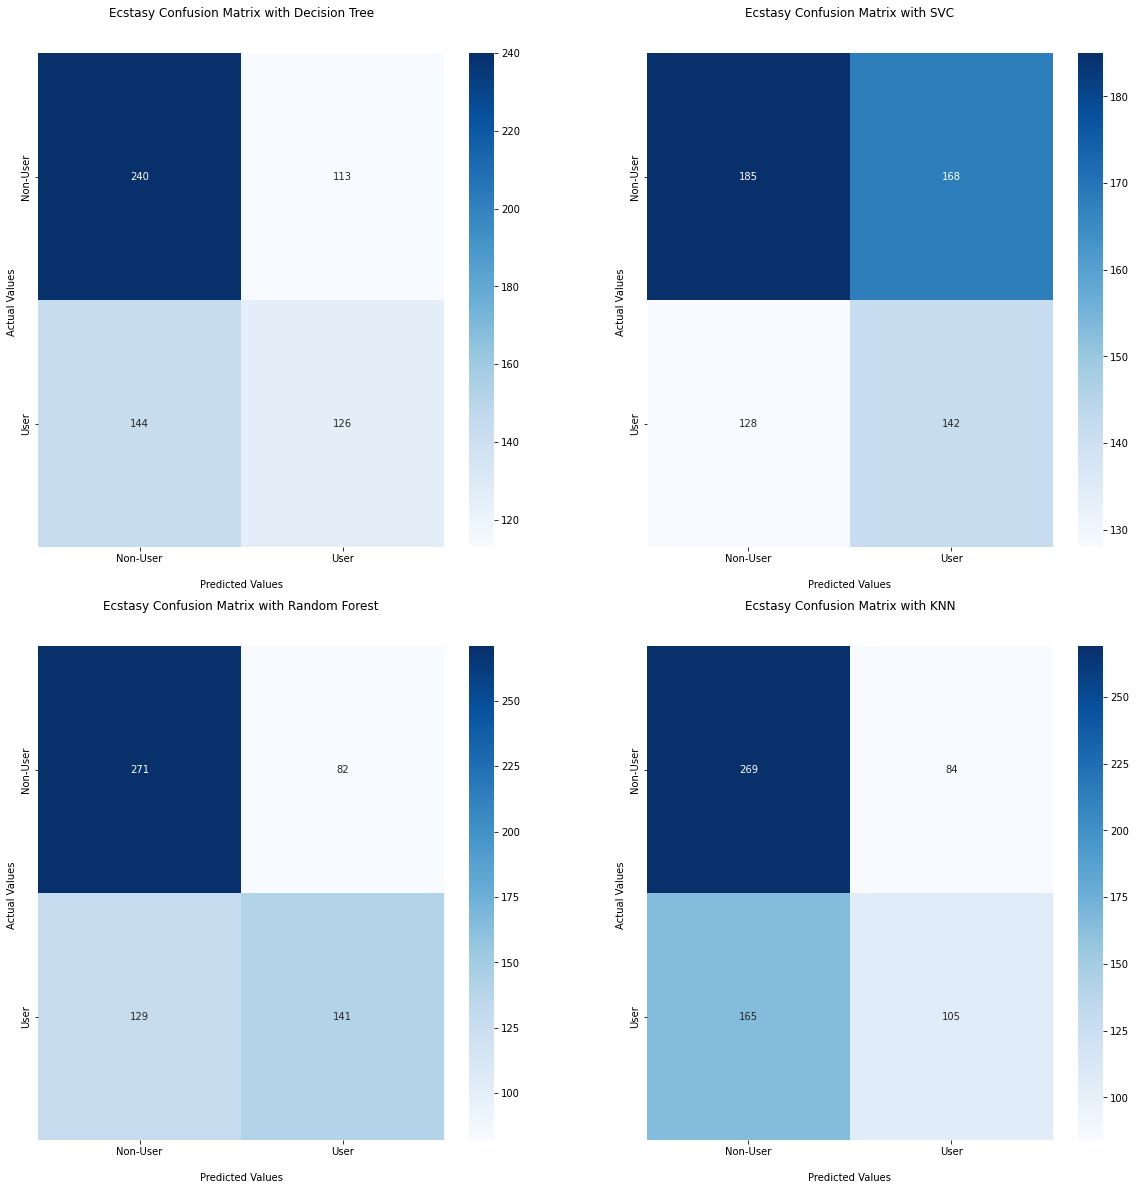

In [256]:
import seaborn as sns
fig = plt.figure(figsize=(20,20))



plt.subplot(2, 2, 1)
cf_matrix_Ecstasy_DT = confusion_matrix(Y_test, Ecstasy_DT_predictions)
print(cf_matrix_Ecstasy_DT)
ax = sns.heatmap(cf_matrix_Ecstasy_DT, annot=True, cmap='Blues', fmt='g')
ax.set_title('Ecstasy Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])


plt.subplot(2, 2, 2)
cf_matrix_Ecstasy_svc = confusion_matrix(Y_test, Ecstasy_svc_predictions)
print(cf_matrix_Ecstasy_svc)
ax = sns.heatmap(cf_matrix_Ecstasy_svc, annot=True, cmap='Blues', fmt='g')
ax.set_title('Ecstasy Confusion Matrix with SVC\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 3)
cf_matrix_Ecstasy_RF = confusion_matrix(Y_test, Ecstasy_RF_predictions)
print(cf_matrix_Ecstasy_RF)
ax = sns.heatmap(cf_matrix_Ecstasy_RF, annot=True, cmap='Blues', fmt='g')
ax.set_title('Ecstasy Confusion Matrix with Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 4)
cf_matrix_Ecstasy_KNN = confusion_matrix(Y_test, Ecstasy_KNN_predictions)
print(cf_matrix_Ecstasy_KNN)
ax = sns.heatmap(cf_matrix_Ecstasy_KNN, annot=True, cmap='Blues', fmt='g')
ax.set_title('Ecstasy Confusion Matrix with KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()

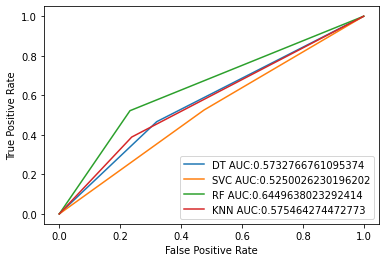

In [258]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  Ecstasy_DT_predictions)
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  Ecstasy_svc_predictions)
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  Ecstasy_RF_predictions)
fpr3, tpr3, _ = metrics.roc_curve(Y_test,  Ecstasy_KNN_predictions)
#create ROC curve
plt.plot(fpr,tpr, label="DT AUC:"+str(roc_auc_score(Y_test,  Ecstasy_DT_predictions)))
plt.plot(fpr1,tpr1, label="SVC AUC:"+str(roc_auc_score(Y_test,  Ecstasy_svc_predictions)))
plt.plot(fpr2,tpr2, label="RF AUC:"+str(roc_auc_score(Y_test,  Ecstasy_RF_predictions)))
plt.plot(fpr3,tpr3, label="KNN AUC:"+str(roc_auc_score(Y_test,  Ecstasy_KNN_predictions)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()